## 1. Importing Libraries

In this section, we import the required libraries for bibliometric analysis and data visualization.

In [12]:
#! pip install pywaffle

In [13]:
import pandas                         as pd
import matplotlib.pyplot              as plt
import seaborn                        as sns
import geopandas                      as gpd
import plotly.express                 as px
import altair                         as alt
import pandas                         as pd
import plotly                         as plotly
import scipy                          as scipy
import altair                         as alt
import plotly.graph_objects           as go

from pywaffle                         import Waffle
from scipy.stats                      import chi2_contingency

## 2. Loading the Dataset

Here we load the bibliographic data, typically exported from a reference manager or database in a BibTeX or CSV format.

In [14]:
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("geopandas version:", gpd.__version__)
print("plotly version:", plotly.__version__)
print("altair version:", alt.__version__)
print("scipy version:", scipy.__version__)

pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2
geopandas version: 1.1.1
plotly version: 5.24.1
altair version: 5.5.0
scipy version: 1.16.1


In [15]:
import sys
print("Python version:", sys.version)

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


In [16]:
import google.colab
print(google.colab.__version__)

0.0.1a2


In [17]:
# Cargar el archivo CSV
file_path = "/content/Tabla de Algoritmos de Deep Learning - Hoja 1.csv"
df = pd.read_csv(file_path, encoding="utf-8", low_memory=False)



In [18]:
# Reemplazar "China " por "China" en la columna "País de estudio"
df["Pais de estudio"] = df["Pais de estudio"].replace("China ", "China")


In [19]:
df["Pais de estudio"].unique()

array(['USA', nan, 'South Korea', 'China', 'Brazil', 'Canada',
       'Indonesia', 'Algeria', 'Turkey', 'Portugal', 'India',
       'Australia ', 'Global', 'Grecia', 'Not Specified', 'Spain',
       'Australia', 'Iran', 'South Africa', 'Not specified ', 'Korea',
       'Not specified', 'Rusia', 'Pakistán', 'Europe ', 'Czech ',
       'Sahara ', 'Tailandia', 'Hawái', 'Congo'], dtype=object)

## 3. Preprocessing Data

We clean and preprocess the data to prepare it for analysis.

# Plot para categoria

In [20]:
unique_source_categories = df['Source Category'].unique()
unique_source_categories


array(['Remote sensing', 'Meteorological', 'Topographic',
       'Socio-economic', nan, 'Socio economic', 'Topograhic'],
      dtype=object)

In [21]:
# Replace "Socio-economic" with "Socio economic" and "Topograhic" with "Topographic"
df = df.replace("Socio-economic", "Socio economic")
df = df.replace("Topograhic", "Topographic")


unique_source_categories = df['Source Category'].unique()
unique_source_categories


array(['Remote sensing', 'Meteorological', 'Topographic',
       'Socio economic', nan], dtype=object)

In [22]:
# 1. Análisis de valores nulos
null_values = df.isnull().sum()
print("Valores nulos por columna:\n", null_values)


Valores nulos por columna:
 Autor                     950
ML o DL                   922
Algoritmo Nombre          836
Algoritmo                 838
Arquitectura              951
Pais de estudio           948
Región de estudio         938
Fuente de datos           930
Nombre Metrica            742
Metrica de evaluacion     742
Repositorio               950
Source Category            38
Source type               664
Product                   472
Feature name               77
Temporal res.             826
Spatial res.              412
Output deseado            912
Link repository          1028
dtype: int64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns


/tmp/ipython-input-1005480612.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


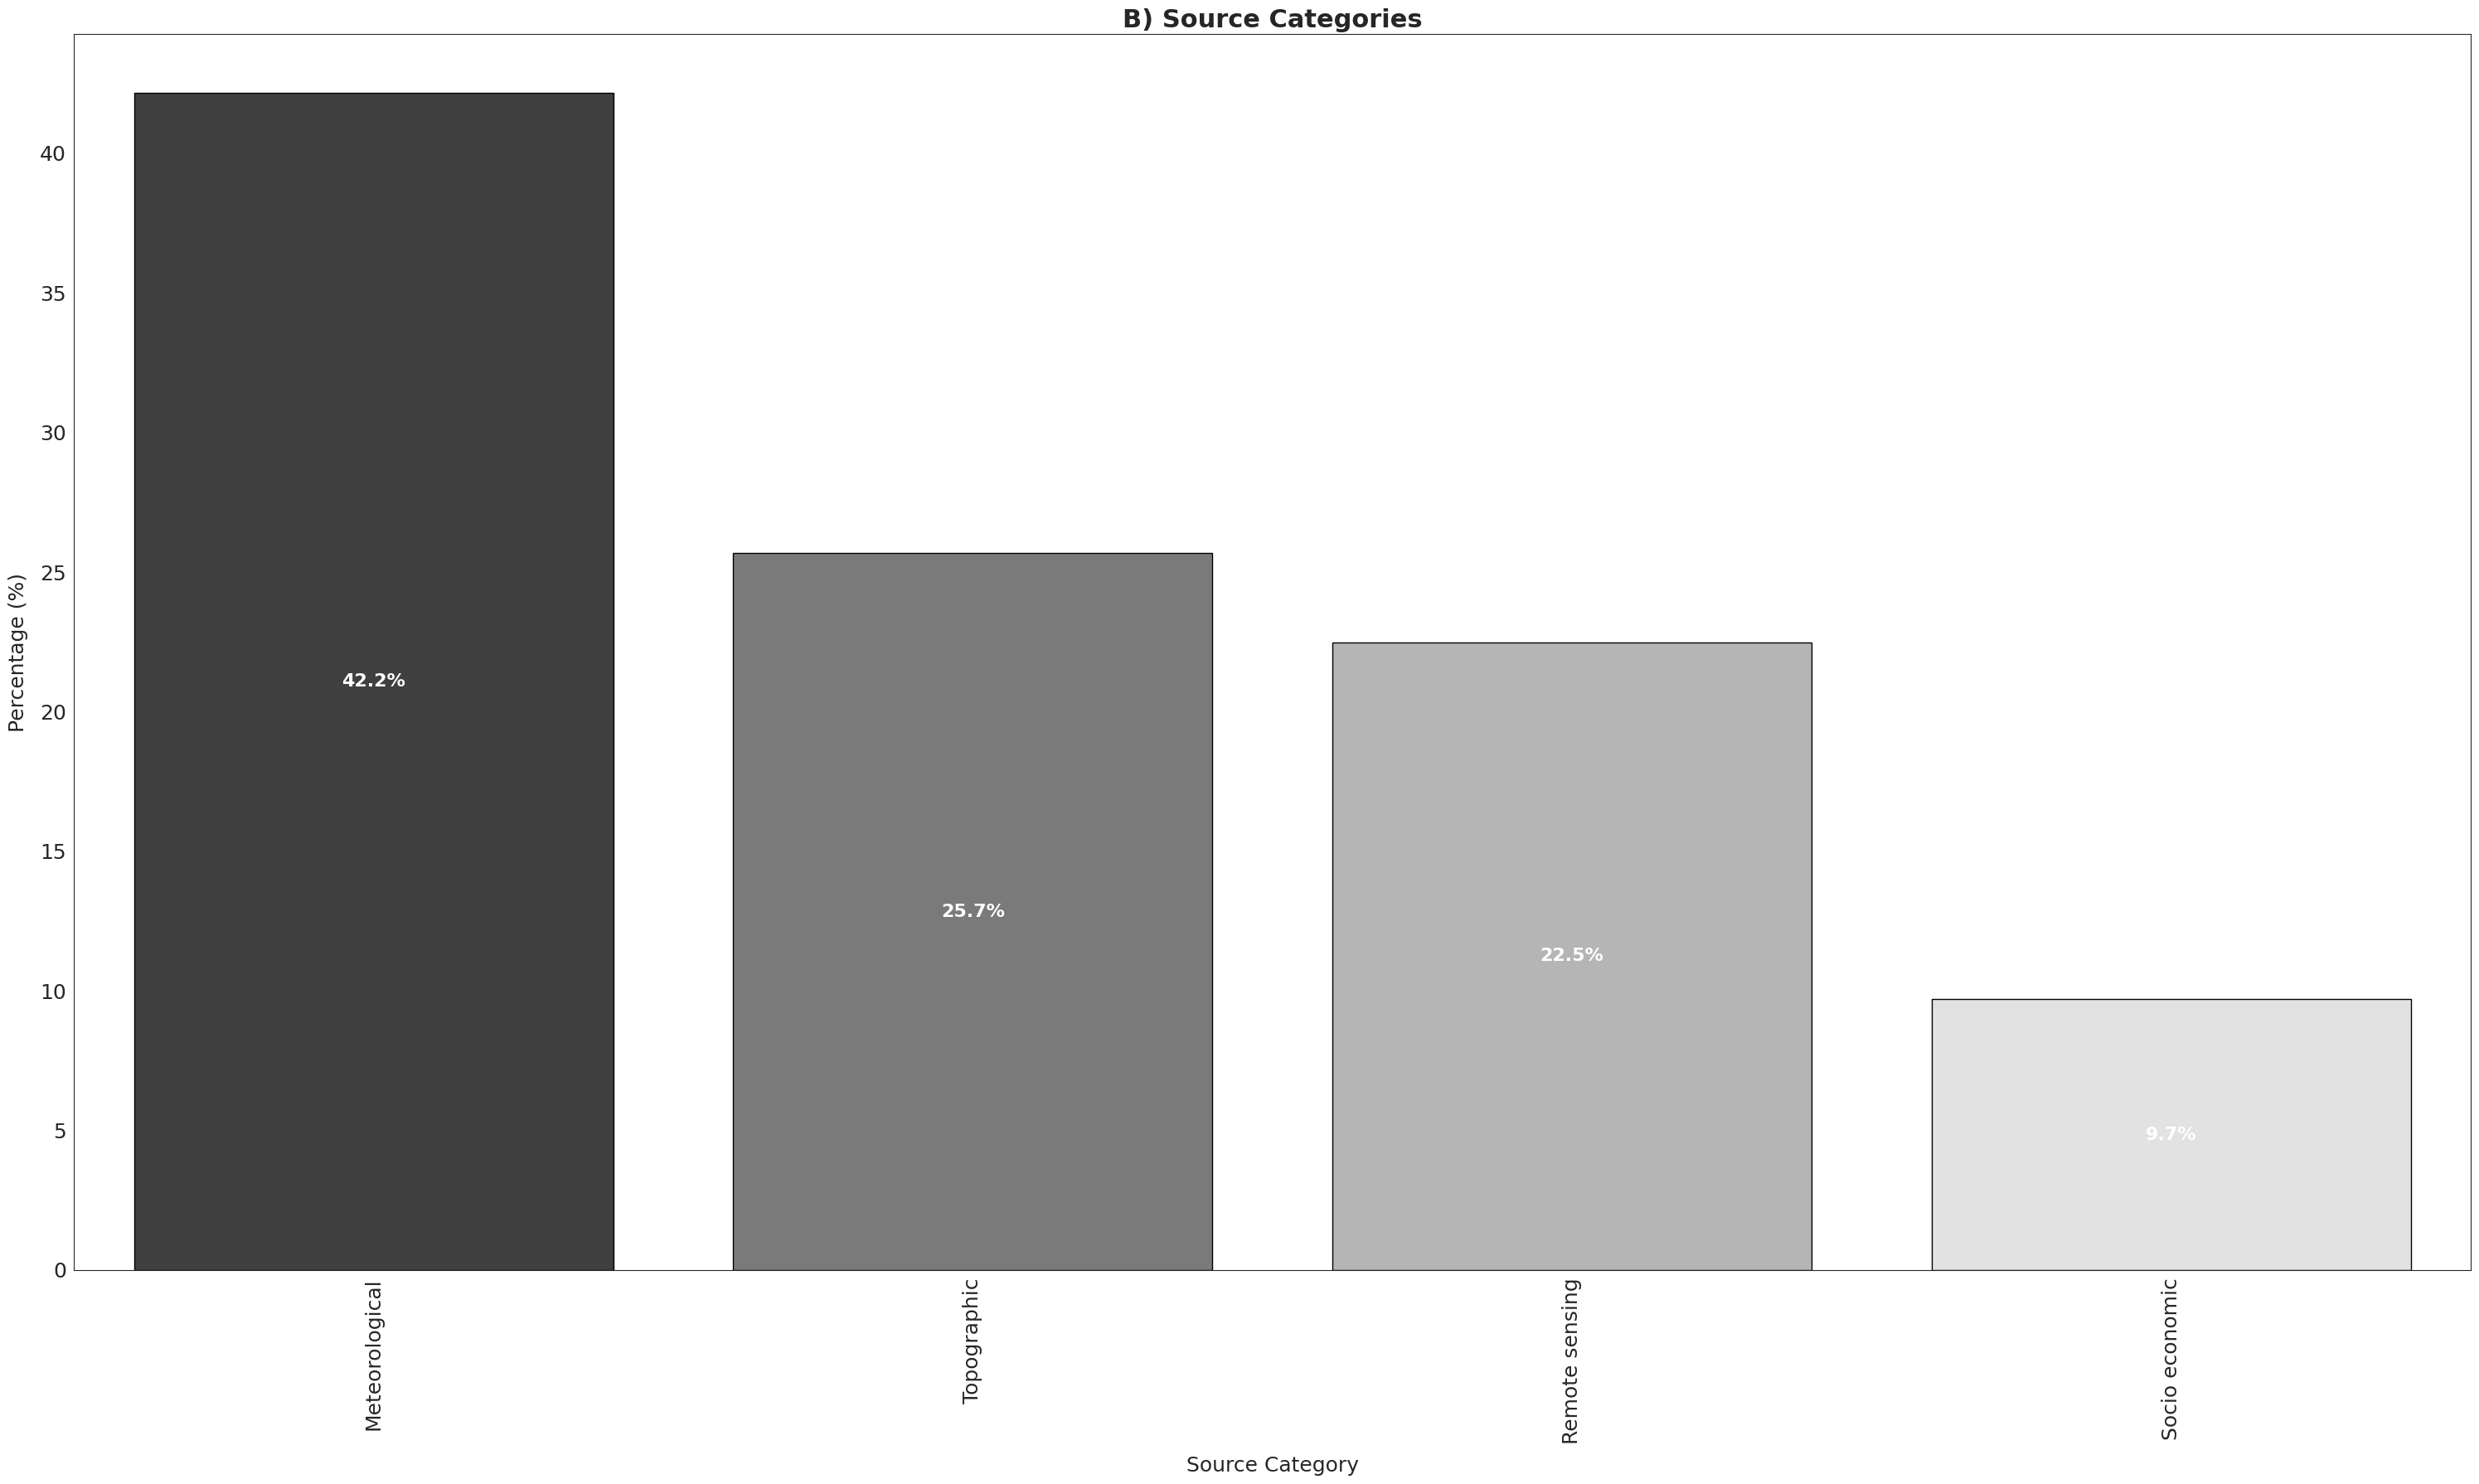

In [24]:
# Contar frecuencia de las 5 categorías más comunes
top_categories = df['Source Category'].value_counts().head(5)

# Calcular porcentajes
percentages = (top_categories / top_categories.sum()) * 100

# Configurar estilo sin líneas de fondo
sns.set_style("white")
plt.figure(figsize=(30, 18))

# Crear gráfico de barras
bars = sns.barplot(
    x=percentages.index,
    y=percentages.values,
    palette="Greys_r",
    edgecolor="black"
)

# Mejorar detalles del gráfico
plt.title("B) Source Categories", fontsize=22, weight="bold")
plt.xlabel("Source Category", fontsize=18, labelpad=10)
plt.ylabel("Percentage (%)", fontsize=18, labelpad=10)
plt.xticks(rotation=90, fontsize=18)  # Cambiado a 90 grados
plt.yticks(fontsize=18)

# Mostrar los valores dentro de las barras
for bar, value in zip(bars.patches, percentages.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,   # posición horizontal centrada
        bar.get_height() / 2,               # posición vertical a mitad de la barra
        f"{value:.1f}%",
        ha="center", va="center",
        fontsize=16, color="white", weight="bold"
    )

# Ajustar el diseño antes de guardar
plt.tight_layout()
plt.savefig("source_categories.png", dpi=600, bbox_inches="tight")
plt.show()


/tmp/ipython-input-1124484743.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_4_categories_percentages.index, y=top_4_categories_percentages.values, palette='Greys_r')  # Create the bar plot directly from the Series


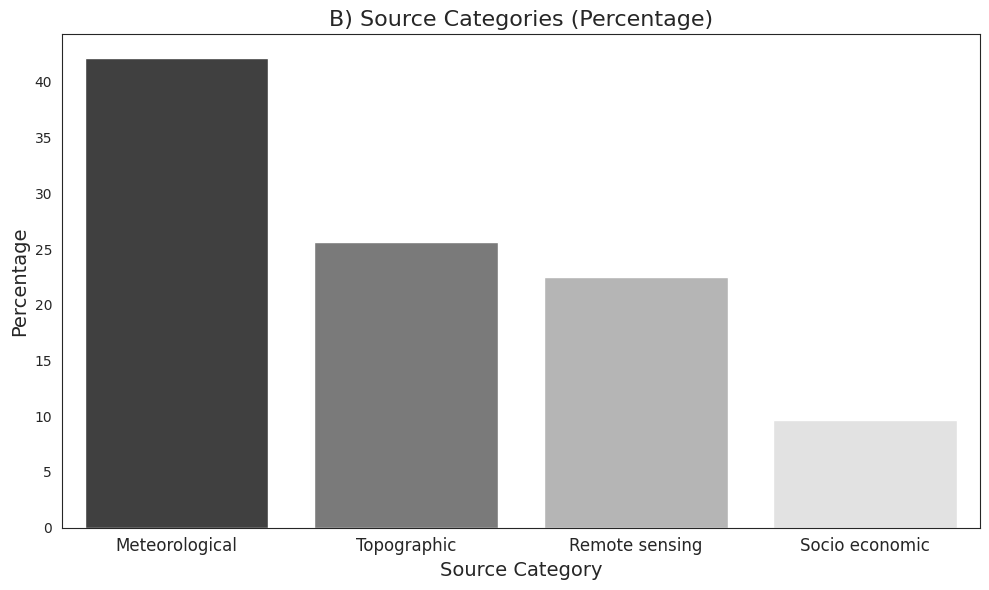

In [25]:
# Count the frequency of each unique value in the `Source Category` column and select the top 5 categories
top_4_categories = df['Source Category'].value_counts().head(5)

# Calculate percentages
total_count = top_4_categories.sum()
top_4_categories_percentages = (top_4_categories / total_count) * 100

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.barplot(x=top_4_categories_percentages.index, y=top_4_categories_percentages.values, palette='Greys_r')  # Create the bar plot directly from the Series
plt.title('B) Source Categories (Percentage)', fontsize=16)  # Set the title of the plot and increase font size
plt.xlabel('Source Category', fontsize=14)  # Set the label for the x-axis and increase font size
plt.ylabel('Percentage', fontsize=14)  # Set the label for the y-axis and increase font size
plt.xticks(rotation=0, ha='center', fontsize=12)  # Rotate the x-axis labels for better readability if needed and increase font size
plt.tight_layout()  # Adjust the layout to prevent labels from overlapping
plt.show()  # Display the plot

/tmp/ipython-input-1347532931.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_4_categories_percentages.index, y=top_4_categories_percentages.values, palette='Greys_r')  # Create the bar plot directly from the Series


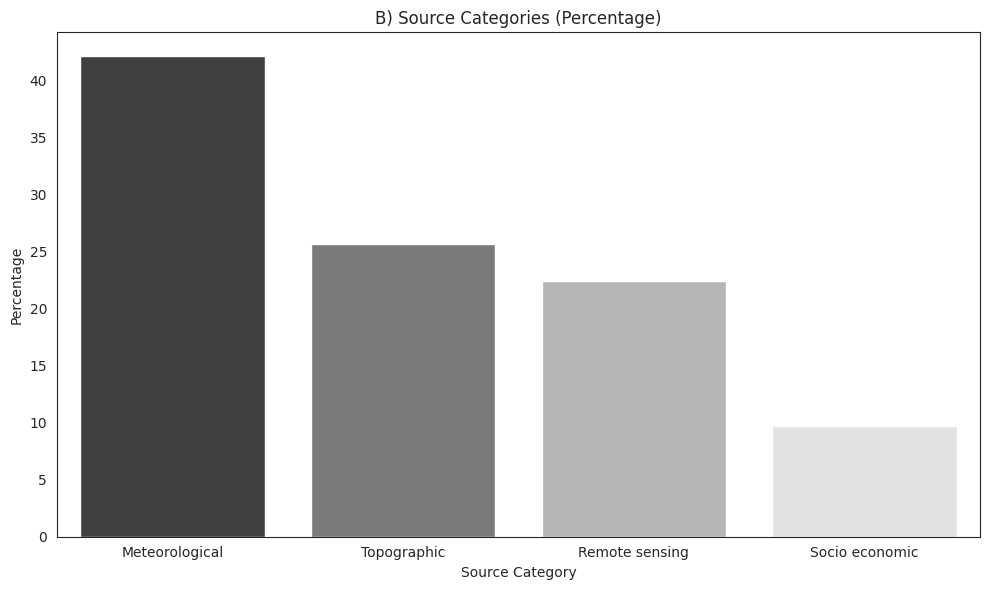

In [26]:
# Count the frequency of each unique value in the `Source Category` column and select the top 5 categories
top_4_categories = df['Source Category'].value_counts().head(5)

# Calculate percentages
total_count = top_4_categories.sum()
top_4_categories_percentages = (top_4_categories / total_count) * 100

# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.barplot(x=top_4_categories_percentages.index, y=top_4_categories_percentages.values, palette='Greys_r')  # Create the bar plot directly from the Series
plt.title('B) Source Categories (Percentage)')  # Set the title of the plot
plt.xlabel('Source Category')  # Set the label for the x-axis
plt.ylabel('Percentage')  # Set the label for the y-axis
plt.xticks(rotation=0, ha='center')  # Rotate the x-axis labels for better readability if needed
plt.tight_layout()  # Adjust the layout to prevent labels from overlapping
plt.show()  # Display the plot


In [27]:
# Calculate percentages for all categories, not just the top 4
category_counts = df['Source Category'].value_counts()
total_count = category_counts.sum()
category_percentages = (category_counts / total_count) * 100

# Print the percentages
print("Percentage of each Source Category:")
print(category_percentages)


Percentage of each Source Category:
Source Category
Meteorological    42.157842
Topographic       25.674326
Remote sensing    22.477522
Socio economic     9.690310
Name: count, dtype: float64


## 4. Bibliometric Analysis

This section includes the main bibliometric computations, such as most frequent authors, journals, keywords, and countries.

In [28]:
# Assuming your dataframe is named 'df' and the column is 'Source Category'
source_category_counts = df['Source Category'].value_counts()

# Calculate percentages
total_count = source_category_counts.sum()
source_category_percentages = (source_category_counts / total_count) * 100


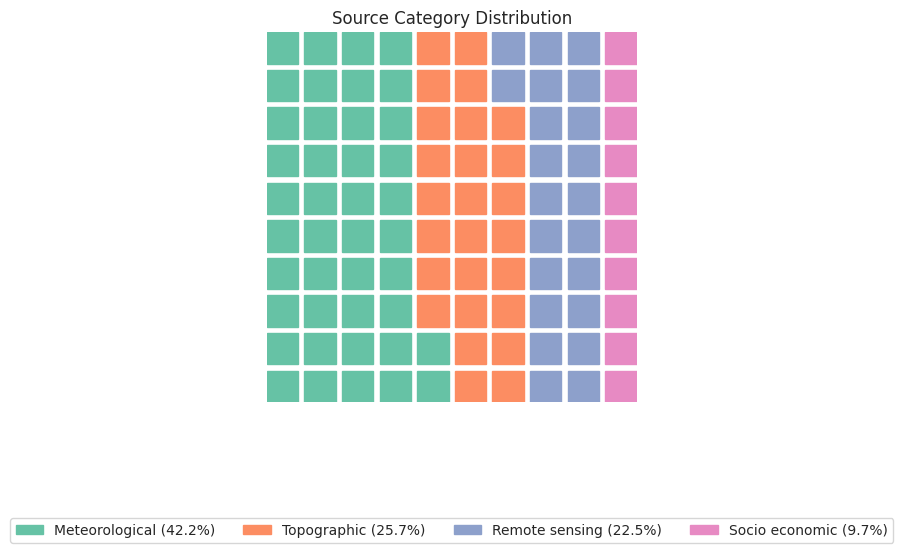

In [29]:
# Select the top N categories (adjust N as needed)
top_n = 10  # Example: Top 10 categories
top_categories = source_category_percentages.head(top_n)

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=top_categories.values,
    labels=[f"{label} ({value:.1f}%)" for label, value in zip(top_categories.index, top_categories.values)],
    legend={'loc': 'lower center', 'bbox_to_anchor': (0.5, -0.4), 'ncol': len(top_categories)}, # Center the legend
    figsize=(10, 6),  # Adjust the figure size as needed
    title={'label': 'Source Category Distribution', 'loc': 'center'}#,
    #cmap_name = "Pastel1" #Added color parameter
)
plt.show()


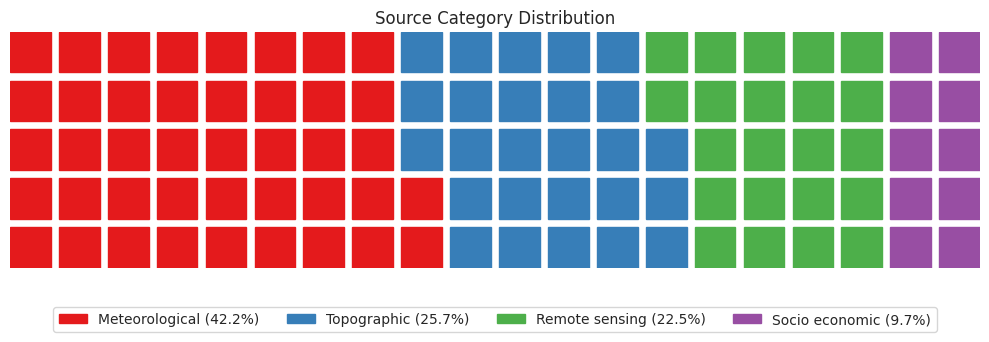

In [30]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=top_categories.values,
    labels=[f"{label} ({value:.1f}%)" for label, value in zip(top_categories.index, top_categories.values)],
    legend={'loc': 'lower center', 'bbox_to_anchor': (0.5, -0.3), 'ncol': len(top_categories)}, #Adjust legend position
    figsize=(10, 6),  # Adjust the figure size as needed
    title={'label': 'Source Category Distribution', 'loc': 'center'},
    cmap_name = "Set1" #Added color parameter
)

# Adjust the layout to center the waffle chart
plt.subplots_adjust(left=0.0, bottom=0.1, right=1.0, top=0.9, wspace=0.2, hspace=0.2) #added this
plt.show()


# Analisis de algoritmo mas usado por pais de estudio

## 5. Network and Visualization

We generate co-authorship, co-citation, and keyword co-occurrence networks with appropriate visualizations.

In [31]:
# Group the data by 'Algoritmo' and 'Pais de estudio' and count the number of occurrences
grouped_data = df.groupby(['Algoritmo', 'Pais de estudio']).size().reset_index(name='Count')

# Display the first 5 rows of the grouped data
print(grouped_data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(grouped_data.info())

| Algoritmo   | Pais de estudio   | Count   |
|:------------|:------------------|:--------|
| ANN         | Australia         | 1       |
| ANN         | China             | 1       |
| ANN         | Czech             | 1       |
| AdaBoost    | India             | 1       |
| AutoGluon   | China             | 1       |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Algoritmo        82 non-null     object
 1   Pais de estudio  82 non-null     object
 2   Count            82 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.1+ KB
None


In [32]:
# Get the top 14 algorithms
top_14_algorithms = df['Algoritmo'].value_counts().head(14).index.tolist()

# Group the data by 'Algoritmo' and 'Pais de estudio' and count the number of occurrences, filtering for the top 14 algorithms
grouped_data = df[df['Algoritmo'].isin(top_14_algorithms)].groupby(['Algoritmo', 'Pais de estudio']).size().reset_index(name='Count')

# Display the first 5 rows of the grouped data
print(grouped_data.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(grouped_data.info())

| Algoritmo   | Pais de estudio   | Count   |
|:------------|:------------------|:--------|
| ANN         | Australia         | 1       |
| ANN         | China             | 1       |
| ANN         | Czech             | 1       |
| CNN         | Brazil            | 1       |
| CNN         | China             | 2       |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Algoritmo        38 non-null     object
 1   Pais de estudio  38 non-null     object
 2   Count            38 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ KB
None


In [33]:
# Create a heatmap
heatmap = alt.Chart(grouped_data).mark_rect().encode(
    x=alt.X('Pais de estudio', title='País de Estudio'), # Map 'Pais de estudio' to the x-axis
    y=alt.Y('Algoritmo', title='Algoritmo'), # Map 'Algoritmo' to the y-axis
    color=alt.Color('Count', title='Count', # Use 'Count' for color intensity
                    scale=alt.Scale(range='heatmap')), # Use heatmap color scale
    tooltip=['Algoritmo', 'Pais de estudio', 'Count'] # Add tooltips for details on hover
).properties(
    title='Heatmap de Algoritmo vs País de Estudio (Top 14 Algoritmos)', # Set the title of the plot
    width=600,  # Increase the width of the heatmap
    height=400   # Increase the height of the heatmap
).interactive()  # Enable interactivity

# Save the heatmap
heatmap.save('algoritmo_pais_estudio_heatmap.json')

# Display the heatmap
heatmap


alt.Chart(...)

In [35]:
# Create a heatmap
heatmap = alt.Chart(grouped_data).mark_rect().encode(
    x=alt.X('Pais de estudio', title=''), # Map 'Pais de estudio' to the x-axis
    y=alt.Y('Algoritmo', title='Algorithm'), # Map 'Algoritmo' to the y-axis
    color=alt.Color('Count', title='Count', # Use 'Count' for color intensity
                    scale=alt.Scale(range=['#f0f0f0', '#000000'])), # Use grey color scale
    tooltip=['Algoritmo', 'Pais de estudio', 'Count'] # Add tooltips for details on hover
).properties(
    title='Heatmap', # Set the title of the plot
    width=1200,  # Increase the width of the heatmap
    height=800   # Increase the height of the heatmap
).configure_axis(
    labelFontSize=18,  # Increase the font size of axis labels
    titleFontSize=22   # Increase the font size of axis titles
).configure_title(
    fontSize=24         # Increase the font size of the plot title
).configure_legend(
    titleFontSize=16,   # Increase the font size of the legend title
    labelFontSize=14    # Increase the font size of the legend labels
).interactive()  # Enable interactivity
# Save the heatmap
heatmap.save('algoritmo_pais_estudio_heatmap.png')
# Display the heatmap
heatmap

ValueError: Saving charts in 'png' format requires the vl-convert-python package: see https://altair-viz.github.io/user_guide/saving_charts.html#png-svg-and-pdf-format

In [ ]:
!pip install vl-convert-python

In [36]:
# Create a heatmap
heatmap = alt.Chart(grouped_data).mark_rect().encode(
    x=alt.X('Pais de estudio', title='', axis=alt.Axis(labelFontSize=20, labelAngle=270)), # Map 'Pais de estudio' to the x-axis with increased label font size and angle
    y=alt.Y('Algoritmo', title='Algorithm', axis=alt.Axis(labelFontSize=18)), # Map 'Algoritmo' to the y-axis
    color=alt.Color('Count', title='Count', # Use 'Count' for color intensity
                    scale=alt.Scale(range=['#f0f0f0', '#000000'])), # Use grey color scale
    tooltip=['Algoritmo', 'Pais de estudio', 'Count'] # Add tooltips for details on hover
).properties(
    title='Heatmap', # Set the title of the plot
    width=1200,  # Increase the width of the heatmap
    height=800   # Increase the height of the heatmap
).configure_title(
    fontSize=24         # Increase the font size of the plot title
).configure_legend(
    titleFontSize=16,   # Increase the font size of the legend title
    labelFontSize=16    # Increase the font size of the legend labels
).interactive()  # Enable interactivity
# Save the heatmap
heatmap.save('algoritmo_pais_estudio_heatmap.png')
# Display the heatmap
heatmap

ValueError: Saving charts in 'png' format requires the vl-convert-python package: see https://altair-viz.github.io/user_guide/saving_charts.html#png-svg-and-pdf-format

In [37]:
# Get the top 14 algorithms
top_14_algorithms = df['Algoritmo'].value_counts().head(14).index.tolist()

# Filter the DataFrame to include only the top 14 algorithms
df_filtered = df[df['Algoritmo'].isin(top_14_algorithms)]

# Group the data by 'Algoritmo' and 'Pais de estudio' and count the number of occurrences
grouped_data = df_filtered.groupby(['Algoritmo', 'Pais de estudio']).size().reset_index(name='Count')

# Prepare the data for the Sankey diagram
source = []
target = []
value = []
algorithm_dict = {}
country_dict = {}

for index, row in grouped_data.iterrows():
  algorithm = row['Algoritmo']
  country = row['Pais de estudio']
  count = row['Count']

  if algorithm not in algorithm_dict:
    algorithm_dict[algorithm] = len(algorithm_dict)
  if country not in country_dict:
    country_dict[country] = len(country_dict)

  source.append(algorithm_dict[algorithm])
  target.append(len(algorithm_dict) + country_dict[country])
  value.append(count)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(algorithm_dict.keys()) + list(country_dict.keys()),
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = value
  ))])

fig.update_layout(title_text="Sankey Diagram: Algoritmo vs País de Estudio (Top 14 Algoritmos)", font_size=10)
fig.show()


In [38]:
# Get the top 14 algorithms
top_14_algorithms = df['Algoritmo'].value_counts().head(14).index.tolist()

# Filter the DataFrame to include only the top 14 algorithms
df_filtered = df[df['Algoritmo'].isin(top_14_algorithms)]

# Group the data by 'Algoritmo' and 'Pais de estudio' and count the number of occurrences
grouped_data = df_filtered.groupby(['Algoritmo', 'Pais de estudio']).size().reset_index(name='Count')

# Prepare the data for the Sankey diagram
source = []
target = []
value = []
algorithm_dict = {}
country_dict = {}

for index, row in grouped_data.iterrows():
  algorithm = row['Algoritmo']
  country = row['Pais de estudio']
  count = row['Count']

  if algorithm not in algorithm_dict:
    algorithm_dict[algorithm] = len(algorithm_dict)
  if country not in country_dict:
    country_dict[country] = len(country_dict)

  source.append(algorithm_dict[algorithm])
  target.append(len(algorithm_dict) + country_dict[country])
  value.append(count)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(algorithm_dict.keys()) + list(country_dict.keys()),
        # Assign different colors to algorithms and countries
        color=["blue"] * len(algorithm_dict) + ["red"] * len(country_dict)
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    ))])

fig.update_layout(
    title_text="Sankey Diagram: Algorithm vs. Country of Study (Top 14 Algorithms)",
    font_size=12,
    width=1000,  # Adjust width as needed
    height=800   # Adjust height as needed
)
fig.show()

/tmp/ipython-input-3620972107.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




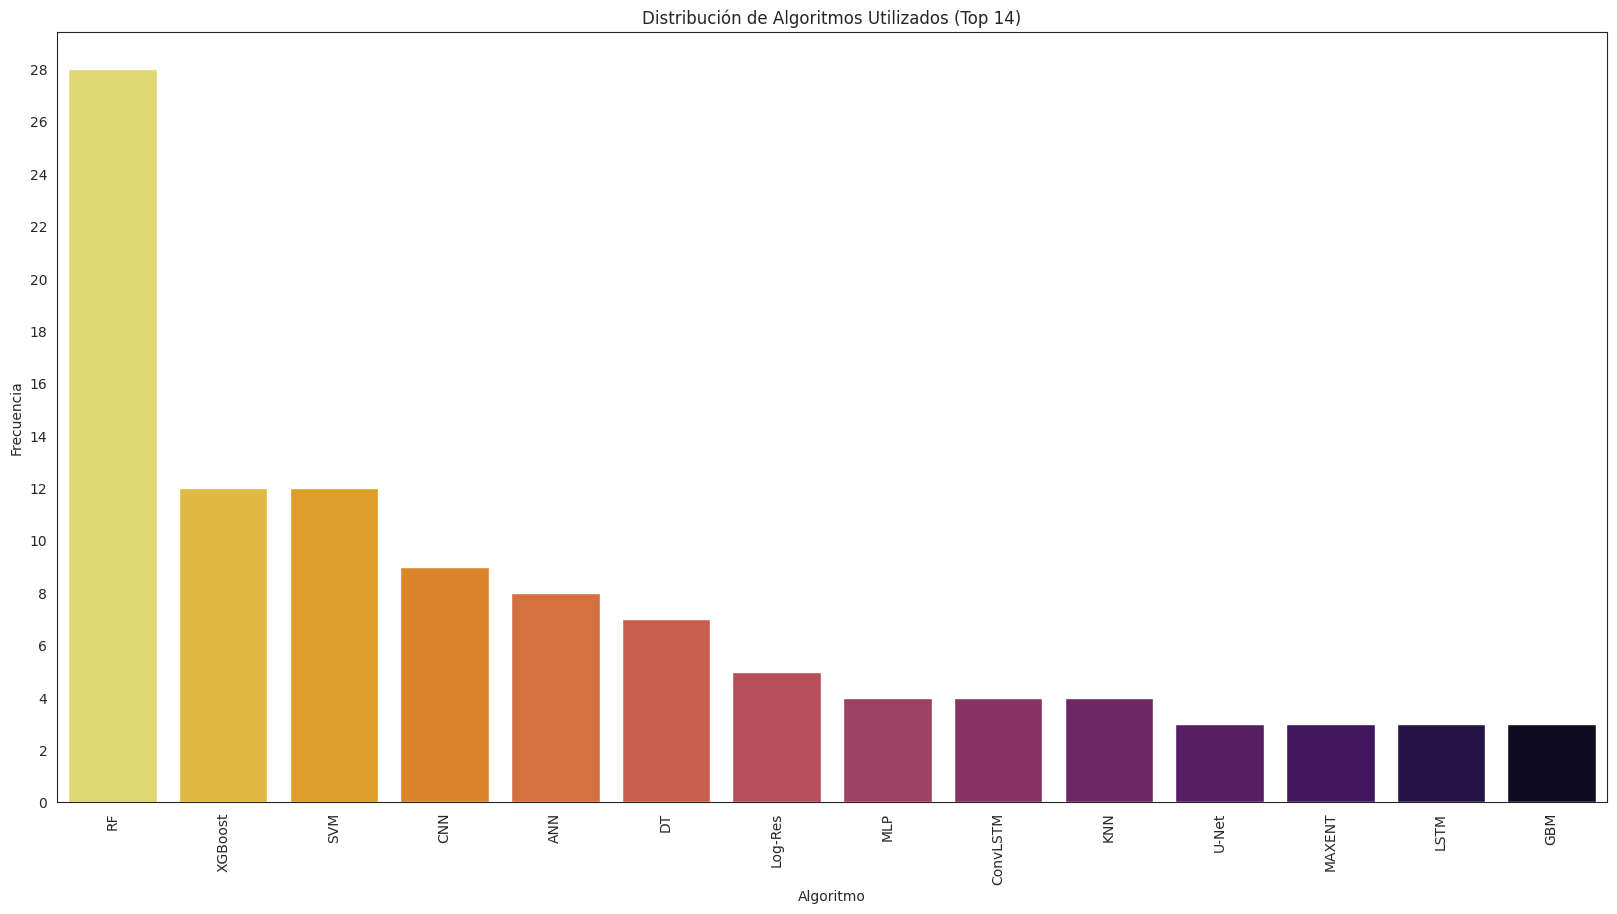

In [39]:
# 2. Distribución de algoritmos (Top 14)
algorithms_distribution = df["Algoritmo"].value_counts().head(14)
plt.figure(figsize=(20, 10))
sns.barplot(x=algorithms_distribution.index, y=algorithms_distribution.values, palette='inferno_r')
plt.xticks(rotation=90)
plt.title("Distribución de Algoritmos Utilizados (Top 14)")
plt.xlabel("Algoritmo")
plt.ylabel("Frecuencia")
plt.yticks(range(0, algorithms_distribution.max()+2, 2))
plt.show()

/tmp/ipython-input-2475040531.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




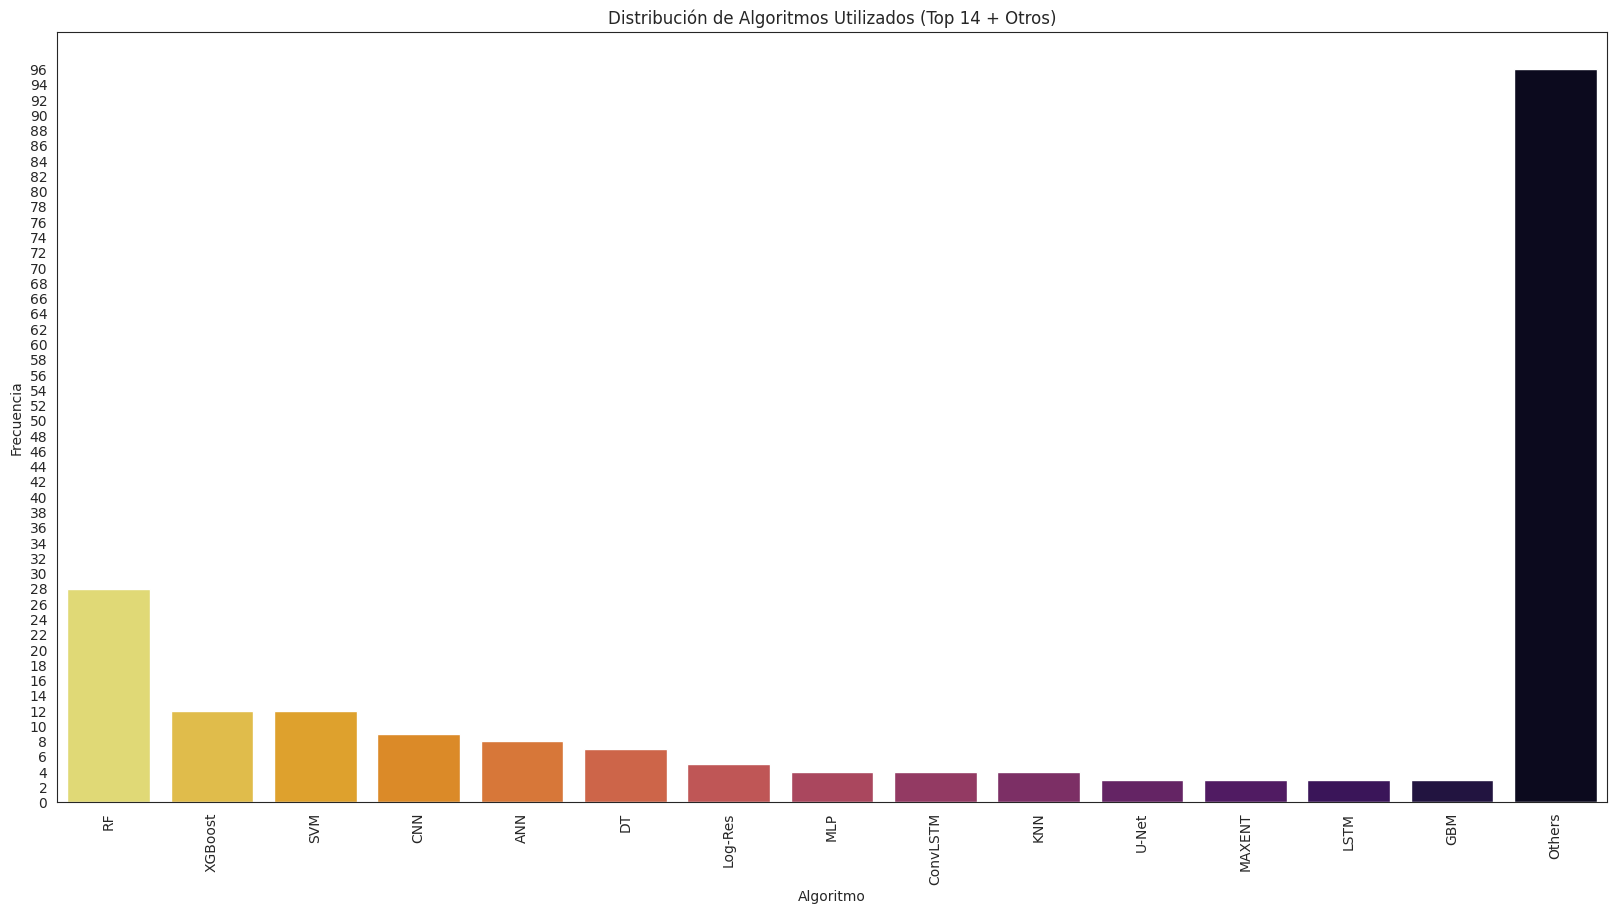

In [40]:
# Seleccionar solo la columna de algoritmos y eliminar valores NaN
algorithms_distribution = df['Algoritmo'].value_counts()
top_algorithms = algorithms_distribution.head(14)
others_count = algorithms_distribution[14:].sum()

# Crear una nueva serie con la categoría "Otros" usando pd.concat
top_algorithms = pd.concat([top_algorithms, pd.Series({'Others': others_count})])

# Crear el gráfico
plt.figure(figsize=(20, 10))
sns.barplot(x=top_algorithms.index, y=top_algorithms.values, palette='inferno_r')
plt.xticks(rotation=90)
plt.title("Distribución de Algoritmos Utilizados (Top 14 + Otros)")
plt.xlabel("Algoritmo")
plt.ylabel("Frecuencia")
plt.yticks(range(0, top_algorithms.max()+2, 2))
plt.show()

/tmp/ipython-input-945351407.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




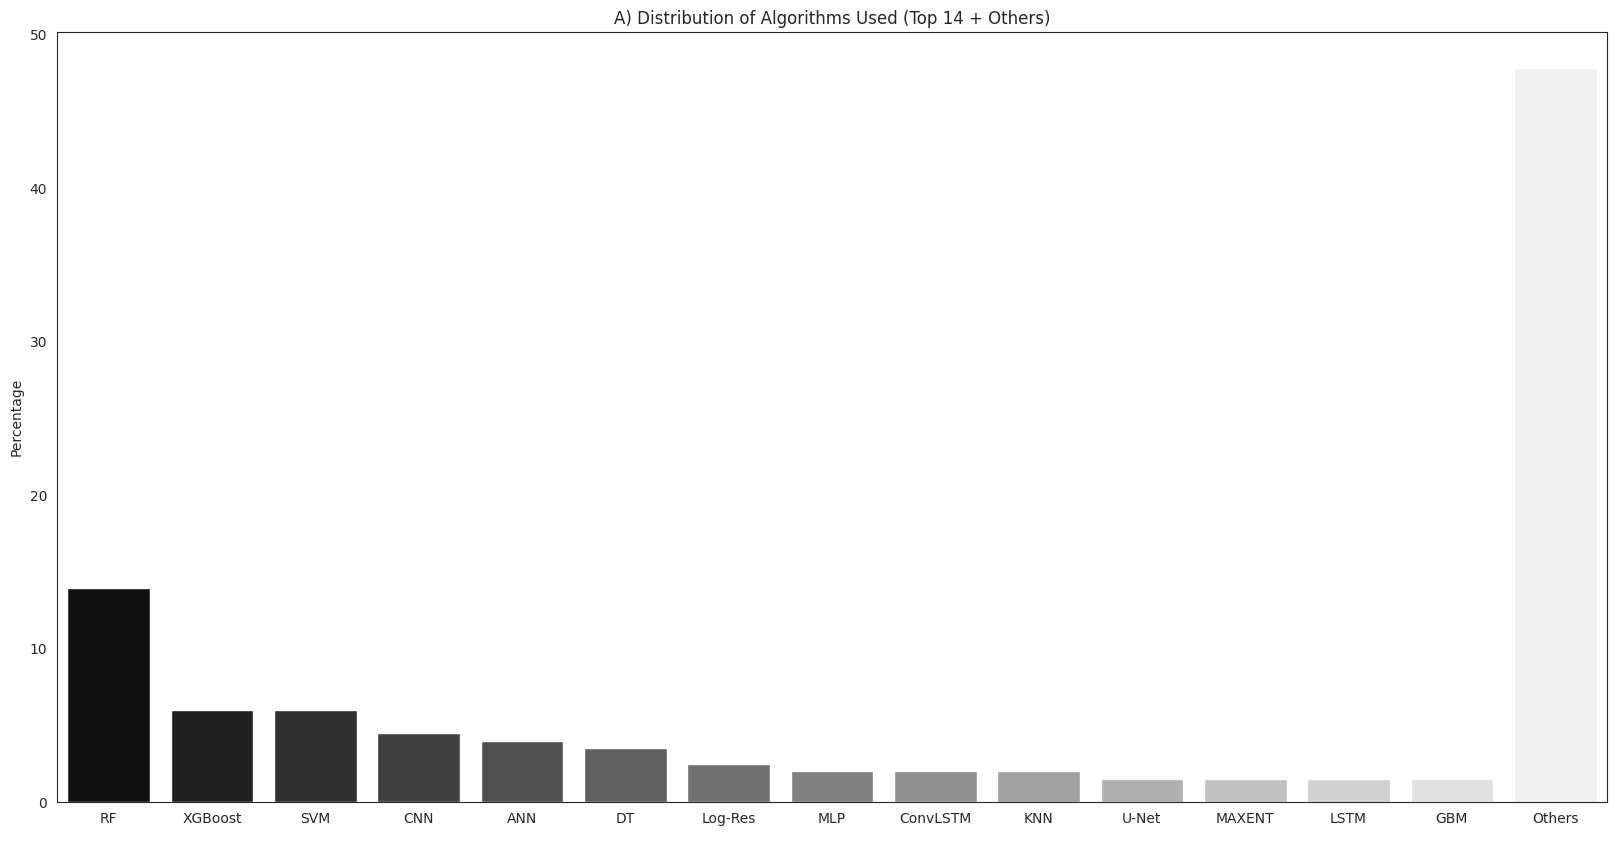

In [41]:
# Seleccionar solo la columna de algoritmos y eliminar valores NaN
algorithms_distribution = df['Algoritmo'].value_counts()
total_count = algorithms_distribution.sum()  # Calcular el total de algoritmos

top_algorithms = algorithms_distribution.head(14)
others_count = algorithms_distribution[14:].sum()

# Crear una nueva serie con la categoría "Otros" usando pd.concat
top_algorithms = pd.concat([top_algorithms, pd.Series({'Others': others_count})])

# Calcular los porcentajes
top_algorithms_percentages = (top_algorithms / total_count) * 100

# Crear el gráfico de barras con porcentajes
plt.figure(figsize=(20, 10))
sns.barplot(x=top_algorithms_percentages.index, y=top_algorithms_percentages.values, palette='gray')
plt.xticks(rotation=0)
plt.title("A) Distribution of Algorithms Used (Top 14 + Others)")
plt.xlabel(" ")
plt.ylabel("Percentage")  # Cambiar la etiqueta del eje y a "Porcentaje"
plt.yticks(range(0, 51, 10))  # Establecer los ticks del eje y de 0 a 100%
plt.show()

In [42]:
#cuantos contiene la columna de "Others"

# Access the 'Others' value from the top_algorithms Series
others_count = top_algorithms['Others']

print(f"La columna 'Others' contiene: {others_count}")

La columna 'Others' contiene: 96


-----
-----

# Metricas de evaluacion más utilizadas

/tmp/ipython-input-1455472528.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




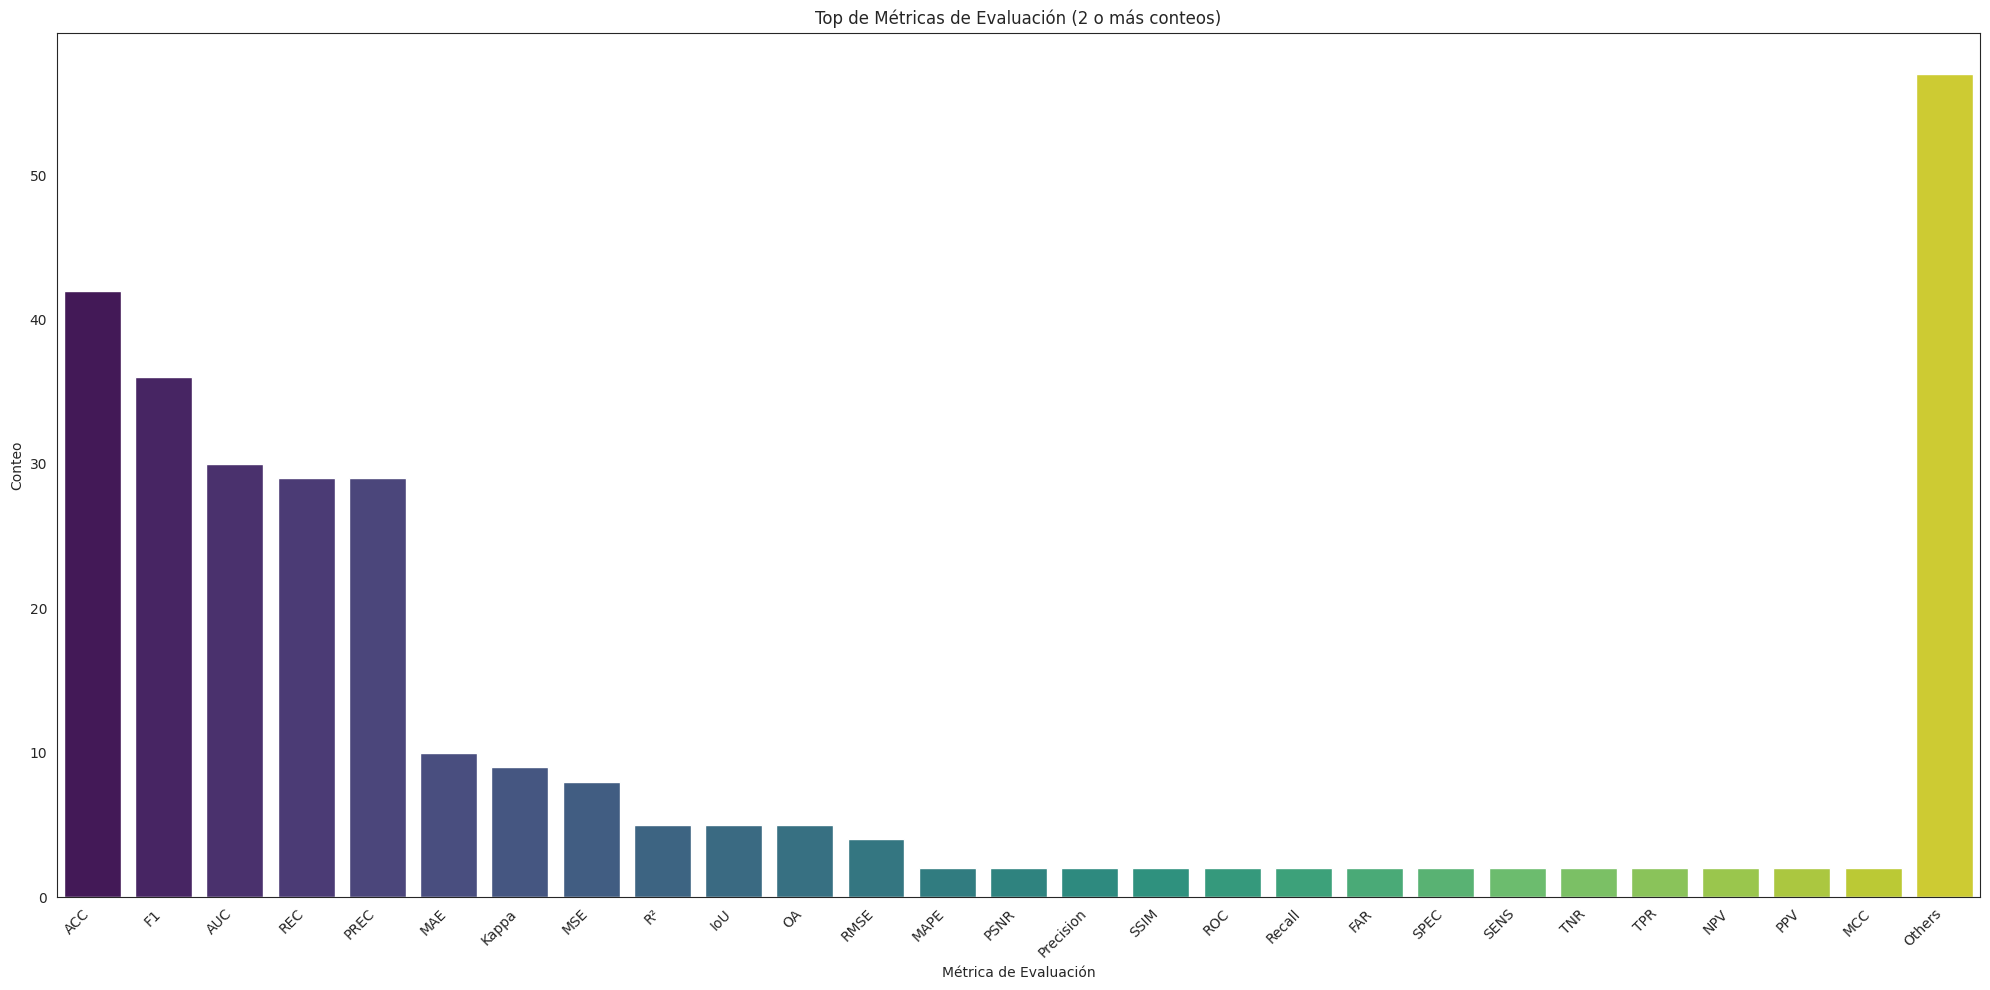

In [43]:
# Suponiendo que 'df' es tu DataFrame y 'Metrica de evaluacion' es la columna relevante
metric_counts = df['Metrica de evaluacion'].value_counts()

# Filtrar métricas con 2 o más conteos
top_metrics = metric_counts[metric_counts >= 2]

# Crear una categoría "Otros" para las métricas con un solo conteo
other_metrics_count = metric_counts[metric_counts < 2].sum()
top_metrics = pd.concat([top_metrics, pd.Series({'Others': other_metrics_count})])

# Crear el gráfico de barras
plt.figure(figsize=(20, 10))
sns.barplot(x=top_metrics.index, y=top_metrics.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top de Métricas de Evaluación (2 o más conteos)')
plt.xlabel('Métrica de Evaluación')
plt.ylabel('Conteo')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3870126683.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




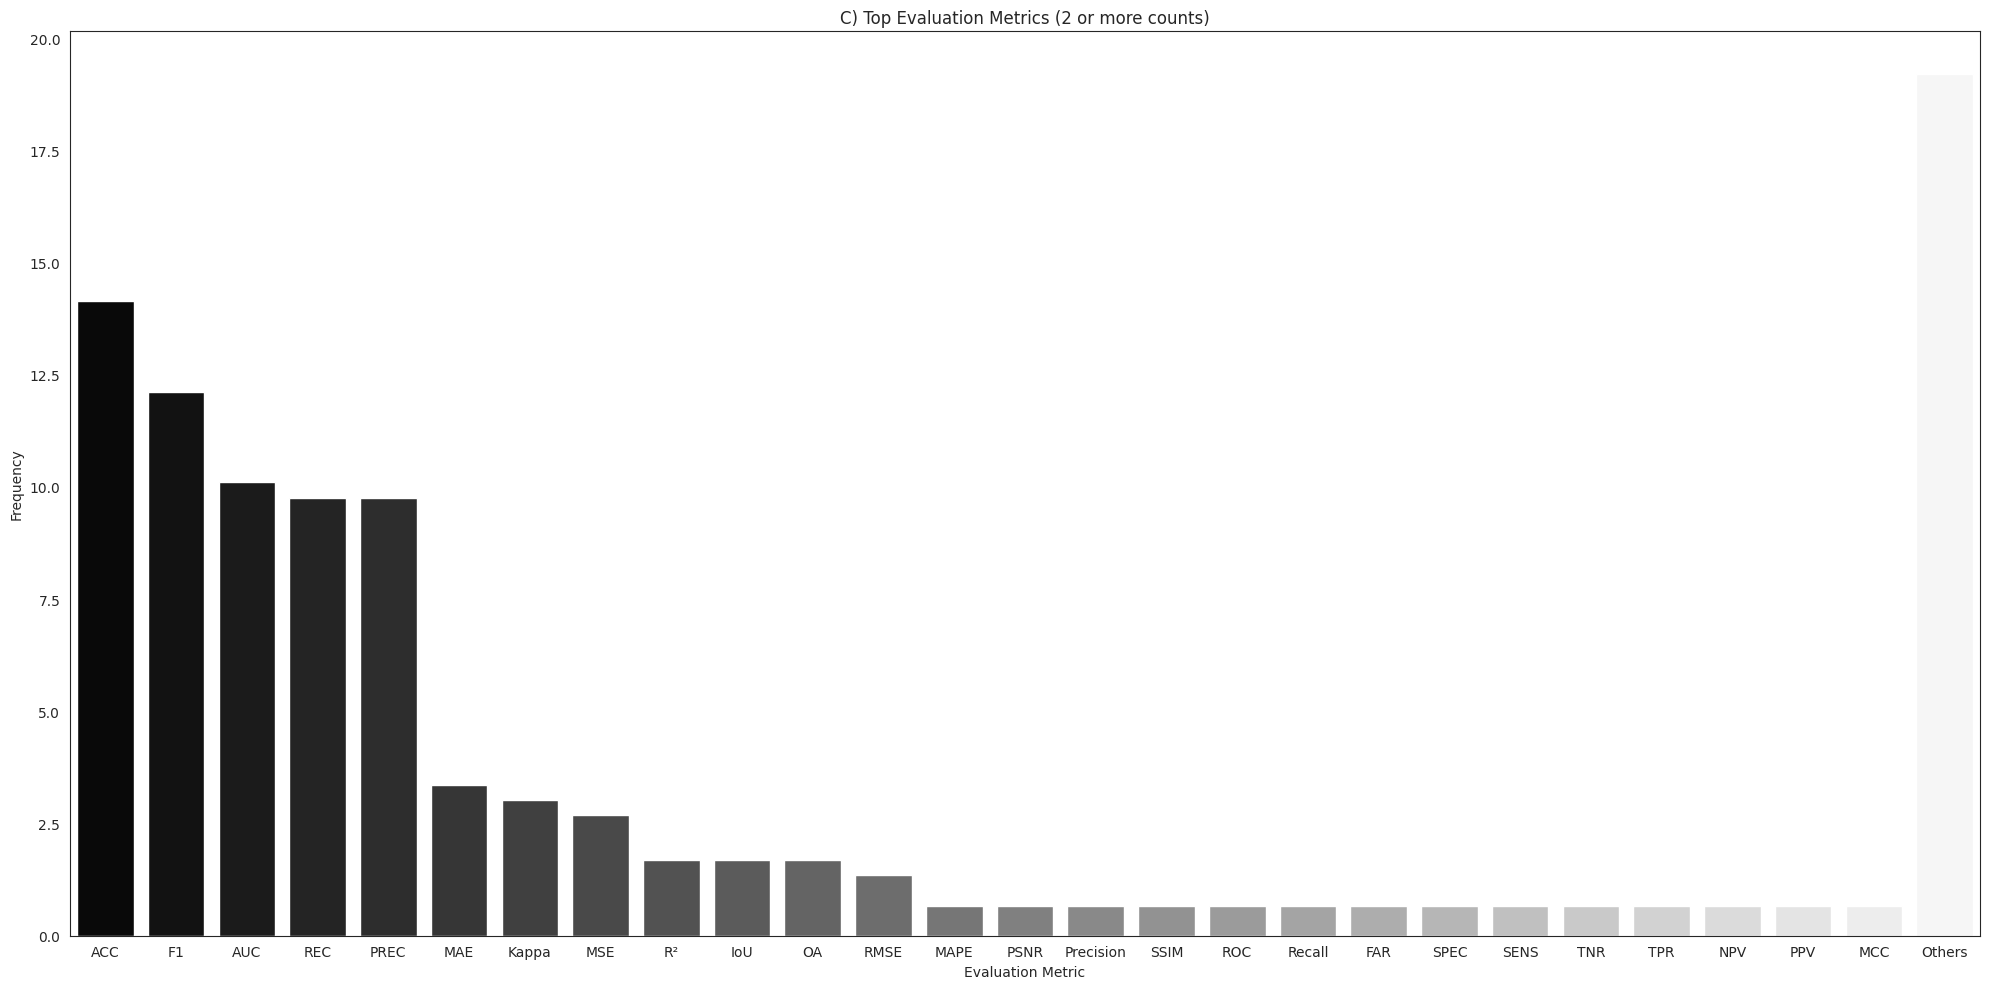

In [44]:
# Calculate percentages
total_metrics = top_metrics.sum()
top_metrics_percentages = (top_metrics / total_metrics) * 100

# Create the bar chart with percentages
plt.figure(figsize=(20, 10))
sns.barplot(x=top_metrics_percentages.index, y=top_metrics_percentages.values, palette='grey')
plt.xticks(rotation=0, ha='center')
plt.title('C) Top Evaluation Metrics (2 or more counts)')
plt.xlabel('Evaluation Metric')
plt.ylabel('Frequency')  # Change y-axis label to "Percentage"
plt.tight_layout()
plt.show()


/tmp/ipython-input-79683631.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




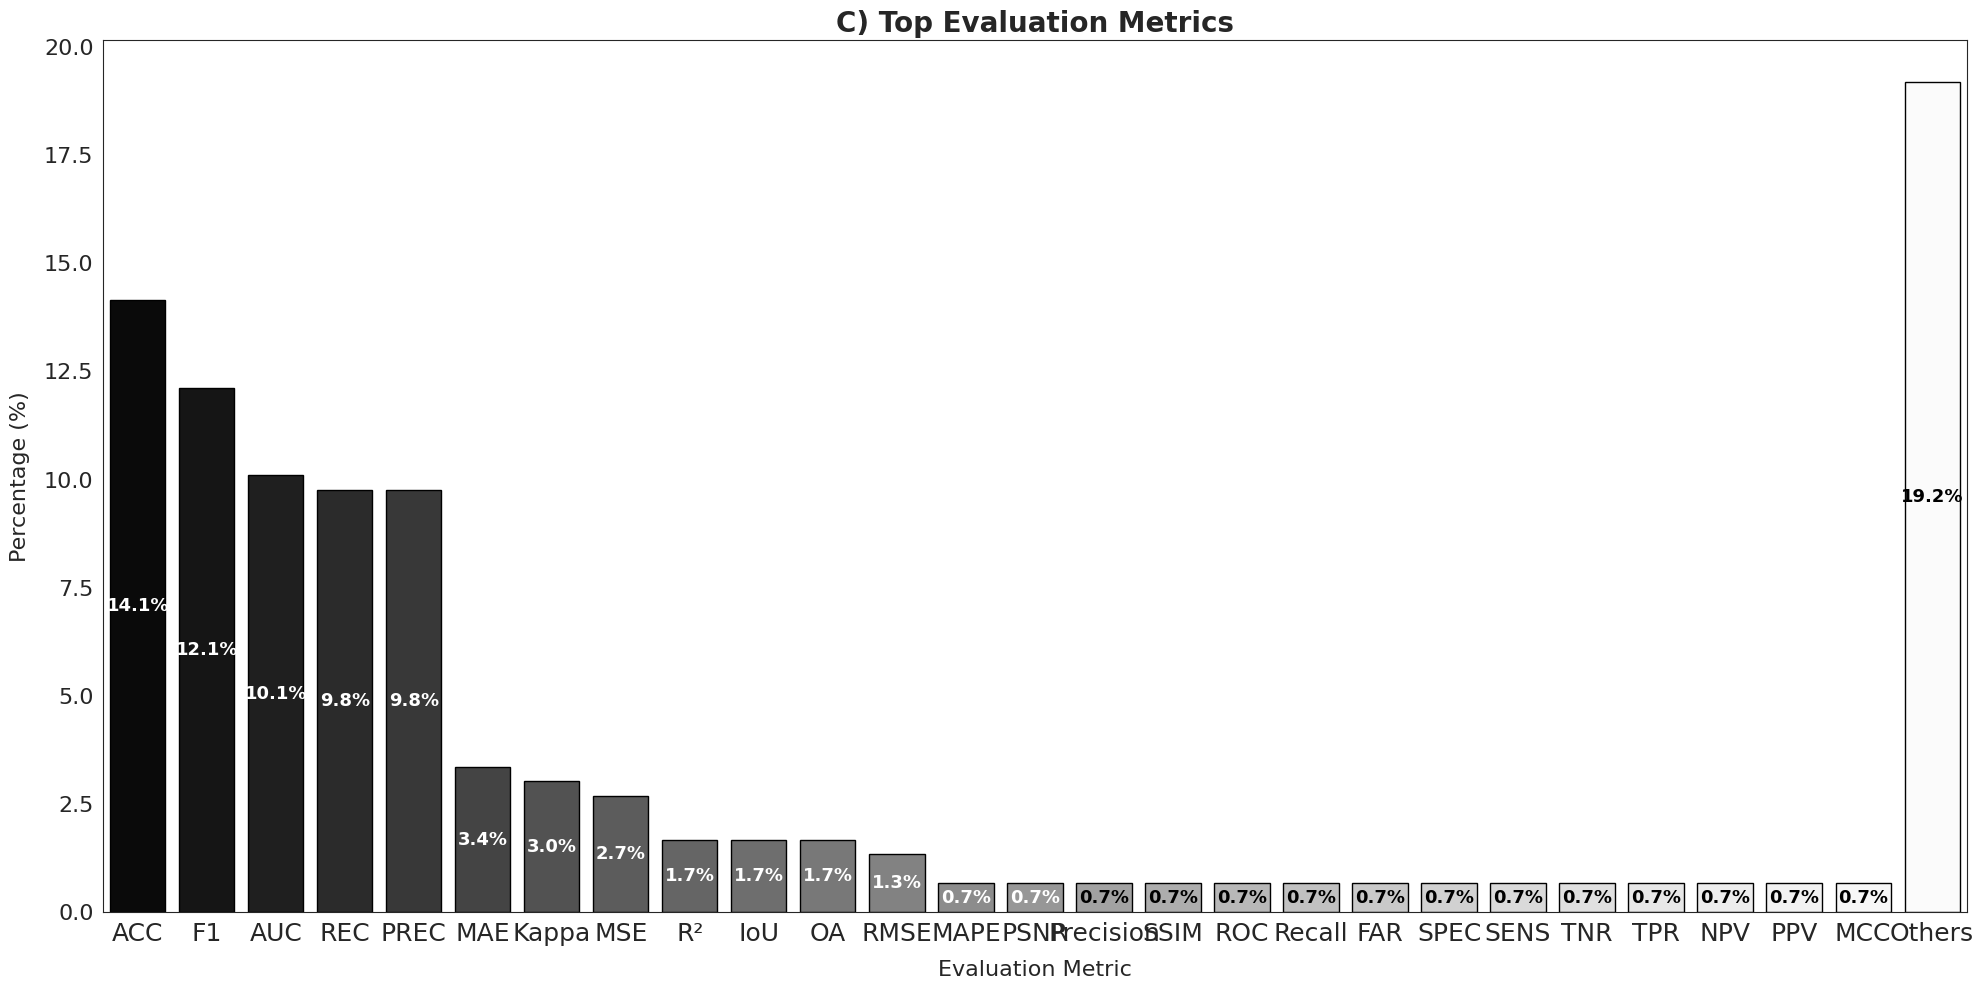

In [45]:
# Calcular porcentajes
total_metrics = top_metrics.sum()
percentages = (top_metrics / total_metrics) * 100

# Configurar estilo sin líneas de fondo
sns.set_style("white")
plt.figure(figsize=(20, 10))

# Crear gráfico de barras
bars = sns.barplot(
    x=percentages.index,
    y=percentages.values,
    palette="Greys_r",
    edgecolor="black"
)

# Mejorar detalles del gráfico
plt.title("C) Top Evaluation Metrics", fontsize=20, weight="bold")
plt.xlabel("Evaluation Metric", fontsize=16, labelpad=10)
plt.ylabel("Percentage (%)", fontsize=16, labelpad=10)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=16)

# Mostrar los valores dentro de las barras con contraste dinámico
for bar, value in zip(bars.patches, percentages.values):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height / 2

    # Obtener el color de la barra
    facecolor = bar.get_facecolor()
    # Calcular brillo relativo (percepción del ojo humano)
    brightness = 0.299*facecolor[0] + 0.587*facecolor[1] + 0.114*facecolor[2]

    # Elegir color de texto en función del brillo
    text_color = "black" if brightness > 0.6 else "white"

    plt.text(
        x, y,
        f"{value:.1f}%",
        ha="center", va="center",
        fontsize=13, color=text_color, weight="bold"
    )


plt.savefig("topevaluation_metrics.png", dpi=600) # Saves the figure as 'my_plot.png' with 300 DPI
plt.tight_layout()
plt.show()

/tmp/ipython-input-823129102.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




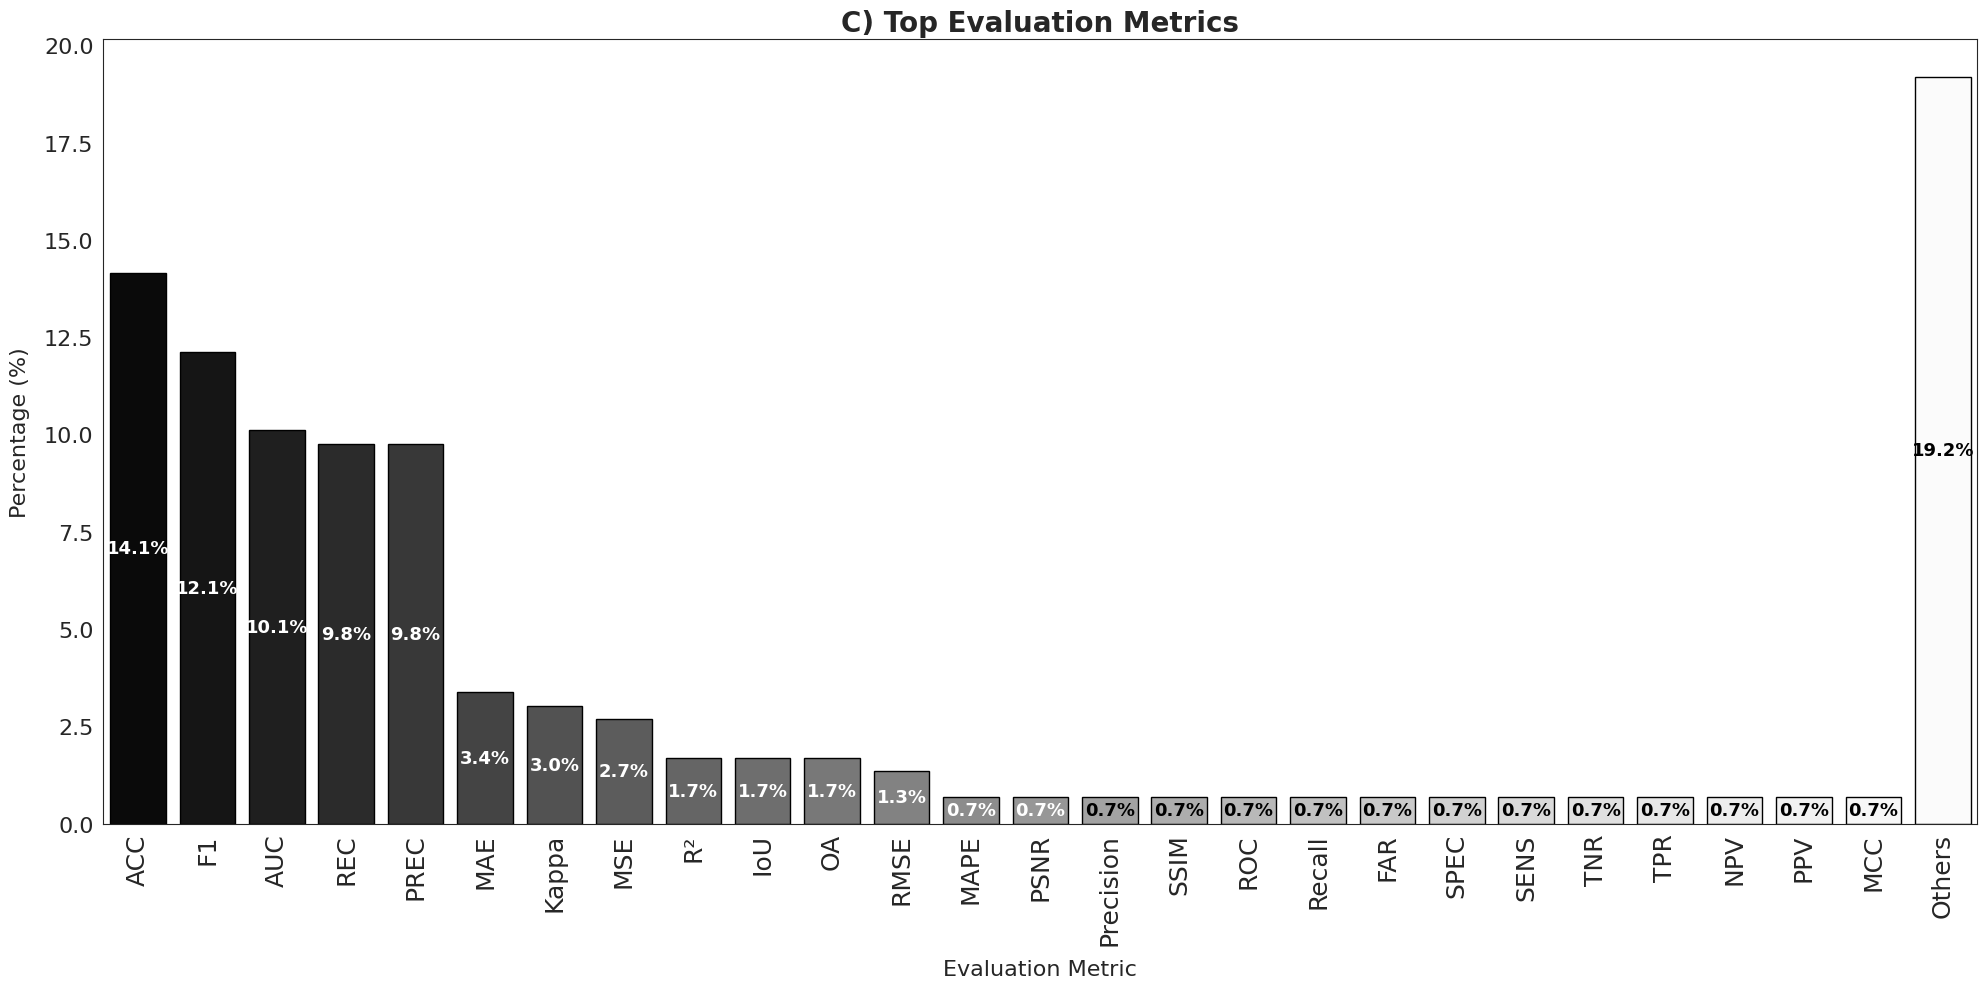

In [46]:
# Calcular porcentajes
total_metrics = top_metrics.sum()
percentages = (top_metrics / total_metrics) * 100

# Configurar estilo sin líneas de fondo
sns.set_style("white")
plt.figure(figsize=(20, 10))

# Crear gráfico de barras
bars = sns.barplot(
    x=percentages.index,
    y=percentages.values,
    palette="Greys_r",
    edgecolor="black"
)

# Mejorar detalles del gráfico
plt.title("C) Top Evaluation Metrics", fontsize=20, weight="bold")
plt.xlabel("Evaluation Metric", fontsize=16, labelpad=10)
plt.ylabel("Percentage (%)", fontsize=16, labelpad=10)
plt.xticks(rotation=90, fontsize=18)  # Cambiado a 270 grados
plt.yticks(fontsize=16)

# Mostrar los valores dentro de las barras con contraste dinámico
for bar, value in zip(bars.patches, percentages.values):
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    y = height / 2

    # Obtener el color de la barra
    facecolor = bar.get_facecolor()
    # Calcular brillo relativo (percepción del ojo humano)
    brightness = 0.299*facecolor[0] + 0.587*facecolor[1] + 0.114*facecolor[2]

    # Elegir color de texto en función del brillo
    text_color = "black" if brightness > 0.6 else "white"

    plt.text(
        x, y,
        f"{value:.1f}%",
        ha="center", va="center",
        fontsize=13, color=text_color, weight="bold"
    )

plt.tight_layout()
plt.savefig("topevaluation_metrics.png", dpi=600) # Saves the figure as 'my_plot.png' with 300 DPI
plt.show()

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Primero necesito saber qué métricas tienes - ejecuta esto:
print("Métricas en tus datos:")
print(top_metrics.index.tolist())

# Diccionario de descripciones (debes completar con tus métricas reales)
metric_descriptions = {
    'Accuracy': ('Mide la proporción de predicciones correctas sobre el total', 'Clasificación'),
    'Precision': ('Mide la proporción de verdaderos positivos entre todos los positivos predichos', 'Clasificación'),
    'Recall': ('Mide la proporción de verdaderos positivos identificados correctamente', 'Clasificación'),
    'F1-score': ('Media armónica entre precision y recall', 'Clasificación'),
    'AUC-ROC': ('Área bajo la curva ROC - mide capacidad de discriminación del modelo', 'Clasificación'),
    'MSE': ('Error cuadrático medio - promedio de los errores al cuadrado', 'Regresión'),
    'RMSE': ('Raíz del error cuadrático medio - en unidades de la variable original', 'Regresión'),
    'MAE': ('Error absoluto medio - promedio de errores absolutos', 'Regresión'),
    'R-squared': ('Coeficiente de determinación - proporción de varianza explicada', 'Regresión'),
    # Agrega aquí todas tus métricas específicas
}

# Crear tabla
table_data = []
for metric, value in top_metrics.items():
    percentage = (value / total_metrics) * 100
    desc, category = metric_descriptions.get(metric, ('Descripción no disponible', 'Otro'))
    table_data.append({
        'Métrica': metric,
        'Porcentaje': f'{percentage:.1f}%',
        'Descripción': desc,
        'Tipo': category
    })

# Crear DataFrame
df_table = pd.DataFrame(table_data)

# Mostrar tabla
print("\nTabla de Métricas de Evaluación:")
print("="*80)
print(df_table.to_string(index=False))

Métricas en tus datos:
['ACC', 'F1', 'AUC', 'REC', 'PREC', 'MAE', 'Kappa', 'MSE', 'R²', 'IoU', 'OA', 'RMSE', 'MAPE', 'PSNR', 'Precision', 'SSIM', 'ROC', 'Recall', 'FAR', 'SPEC', 'SENS', 'TNR', 'TPR', 'NPV', 'PPV', 'MCC', 'Others']

Tabla de Métricas de Evaluación:
  Métrica Porcentaje                                                                    Descripción          Tipo
      ACC      14.1%                                                      Descripción no disponible          Otro
       F1      12.1%                                                      Descripción no disponible          Otro
      AUC      10.1%                                                      Descripción no disponible          Otro
      REC       9.8%                                                      Descripción no disponible          Otro
     PREC       9.8%                                                      Descripción no disponible          Otro
      MAE       3.4%                           Erro

In [48]:
import pandas as pd

# Diccionario de descripciones completas
metric_descriptions = {
    'ACC': ('Accuracy - Mide la proporción de predicciones correctas sobre el total', 'Clasificación'),
    'F1': ('F1-Score - Media armónica entre Precision y Recall', 'Clasificación'),
    'AUC': ('Area Under Curve - Área bajo la curva ROC, mide capacidad de discriminación', 'Clasificación'),
    'REC': ('Recall - Mide la proporción de verdaderos positivos identificados correctamente', 'Clasificación'),
    'PREC': ('Precision - Mide la proporción de verdaderos positivos entre todos los positivos predichos', 'Clasificación'),
    'MAE': ('Mean Absolute Error - Error absoluto medio, promedio de errores absolutos', 'Regresión'),
    'Kappa': ("Cohen's Kappa - Mide el acuerdo entre clasificadores considerando el azar", 'Clasificación'),
    'MSE': ('Mean Squared Error - Error cuadrático medio, promedio de los errores al cuadrado', 'Regresión'),
    'R²': ('R-squared - Coeficiente de determinación, proporción de varianza explicada', 'Regresión'),
    'IoU': ('Intersection over Union - Mide la superposición entre predicciones y verdades', 'Segmentación'),
    'OA': ('Overall Accuracy - Exactitud global en clasificación', 'Clasificación'),
    'RMSE': ('Root Mean Squared Error - Raíz del error cuadrático medio', 'Regresión'),
    'MAPE': ('Mean Absolute Percentage Error - Error porcentual absoluto medio', 'Regresión'),
    'PSNR': ('Peak Signal-to-Noise Ratio - Relación pico señal-ruido', 'Procesamiento de imágenes'),
    'Precision': ('Precision - Mide la proporción de verdaderos positivos entre todos los positivos predichos', 'Clasificación'),
    'SSIM': ('Structural Similarity Index - Índice de similitud estructural', 'Procesamiento de imágenes'),
    'ROC': ('Receiver Operating Characteristic - Característica operativa del receptor', 'Clasificación'),
    'Recall': ('Recall - Mide la proporción de verdaderos positivos identificados correctamente', 'Clasificación'),
    'FAR': ('False Acceptance Rate - Tasa de falsa aceptación', 'Clasificación binaria'),
    'SPEC': ('Specificity - Especificidad, capacidad de identificar negativos correctamente', 'Clasificación'),
    'SENS': ('Sensitivity - Sensibilidad, mismo que Recall', 'Clasificación'),
    'TNR': ('True Negative Rate - Tasa de verdaderos negativos, mismo que Specificity', 'Clasificación'),
    'TPR': ('True Positive Rate - Tasa de verdaderos positivos, mismo que Recall', 'Clasificación'),
    'NPV': ('Negative Predictive Value - Valor predictivo negativo', 'Clasificación'),
    'PPV': ('Positive Predictive Value - Valor predictivo positivo, mismo que Precision', 'Clasificación'),
    'MCC': ('Matthews Correlation Coefficient - Coeficiente de correlación de Matthews', 'Clasificación'),
    'Others': ('Otras métricas diversas no especificadas', 'Varios')
}

# Crear tabla completa
table_data = []
for metric, value in top_metrics.items():
    percentage = (value / total_metrics) * 100
    desc, category = metric_descriptions.get(metric, ('Descripción no disponible', 'Varios'))
    table_data.append({
        'Métrica': metric,
        'Porcentaje': f'{percentage:.1f}%',
        'Descripción': desc,
        'Tipo': category
    })

# Crear DataFrame
df_table = pd.DataFrame(table_data)

# Mostrar tabla formateada
print("Tabla de Métricas de Evaluación:")
print("="*100)
print(f"{'Métrica':<8} {'Porcentaje':<10} {'Descripción':<65} {'Tipo':<20}")
print("-"*100)
for _, row in df_table.iterrows():
    print(f"{row['Métrica']:<8} {row['Porcentaje']:<10} {row['Descripción']:<65} {row['Tipo']:<20}")
print("="*100)

# Guardar como CSV
df_table.to_csv('metricas_evaluacion_completa.csv', index=False, encoding='utf-8')

Tabla de Métricas de Evaluación:
Métrica  Porcentaje Descripción                                                       Tipo                
----------------------------------------------------------------------------------------------------
ACC      14.1%      Accuracy - Mide la proporción de predicciones correctas sobre el total Clasificación       
F1       12.1%      F1-Score - Media armónica entre Precision y Recall                Clasificación       
AUC      10.1%      Area Under Curve - Área bajo la curva ROC, mide capacidad de discriminación Clasificación       
REC      9.8%       Recall - Mide la proporción de verdaderos positivos identificados correctamente Clasificación       
PREC     9.8%       Precision - Mide la proporción de verdaderos positivos entre todos los positivos predichos Clasificación       
MAE      3.4%       Mean Absolute Error - Error absoluto medio, promedio de errores absolutos Regresión           
Kappa    3.0%       Cohen's Kappa - Mide el acuerdo ent

In [49]:
# Access the 'Otros' value from the top_metrics Series
otros_count = top_metrics['Others']

print(f"La columna 'Otros' contiene: {otros_count}")


La columna 'Otros' contiene: 57


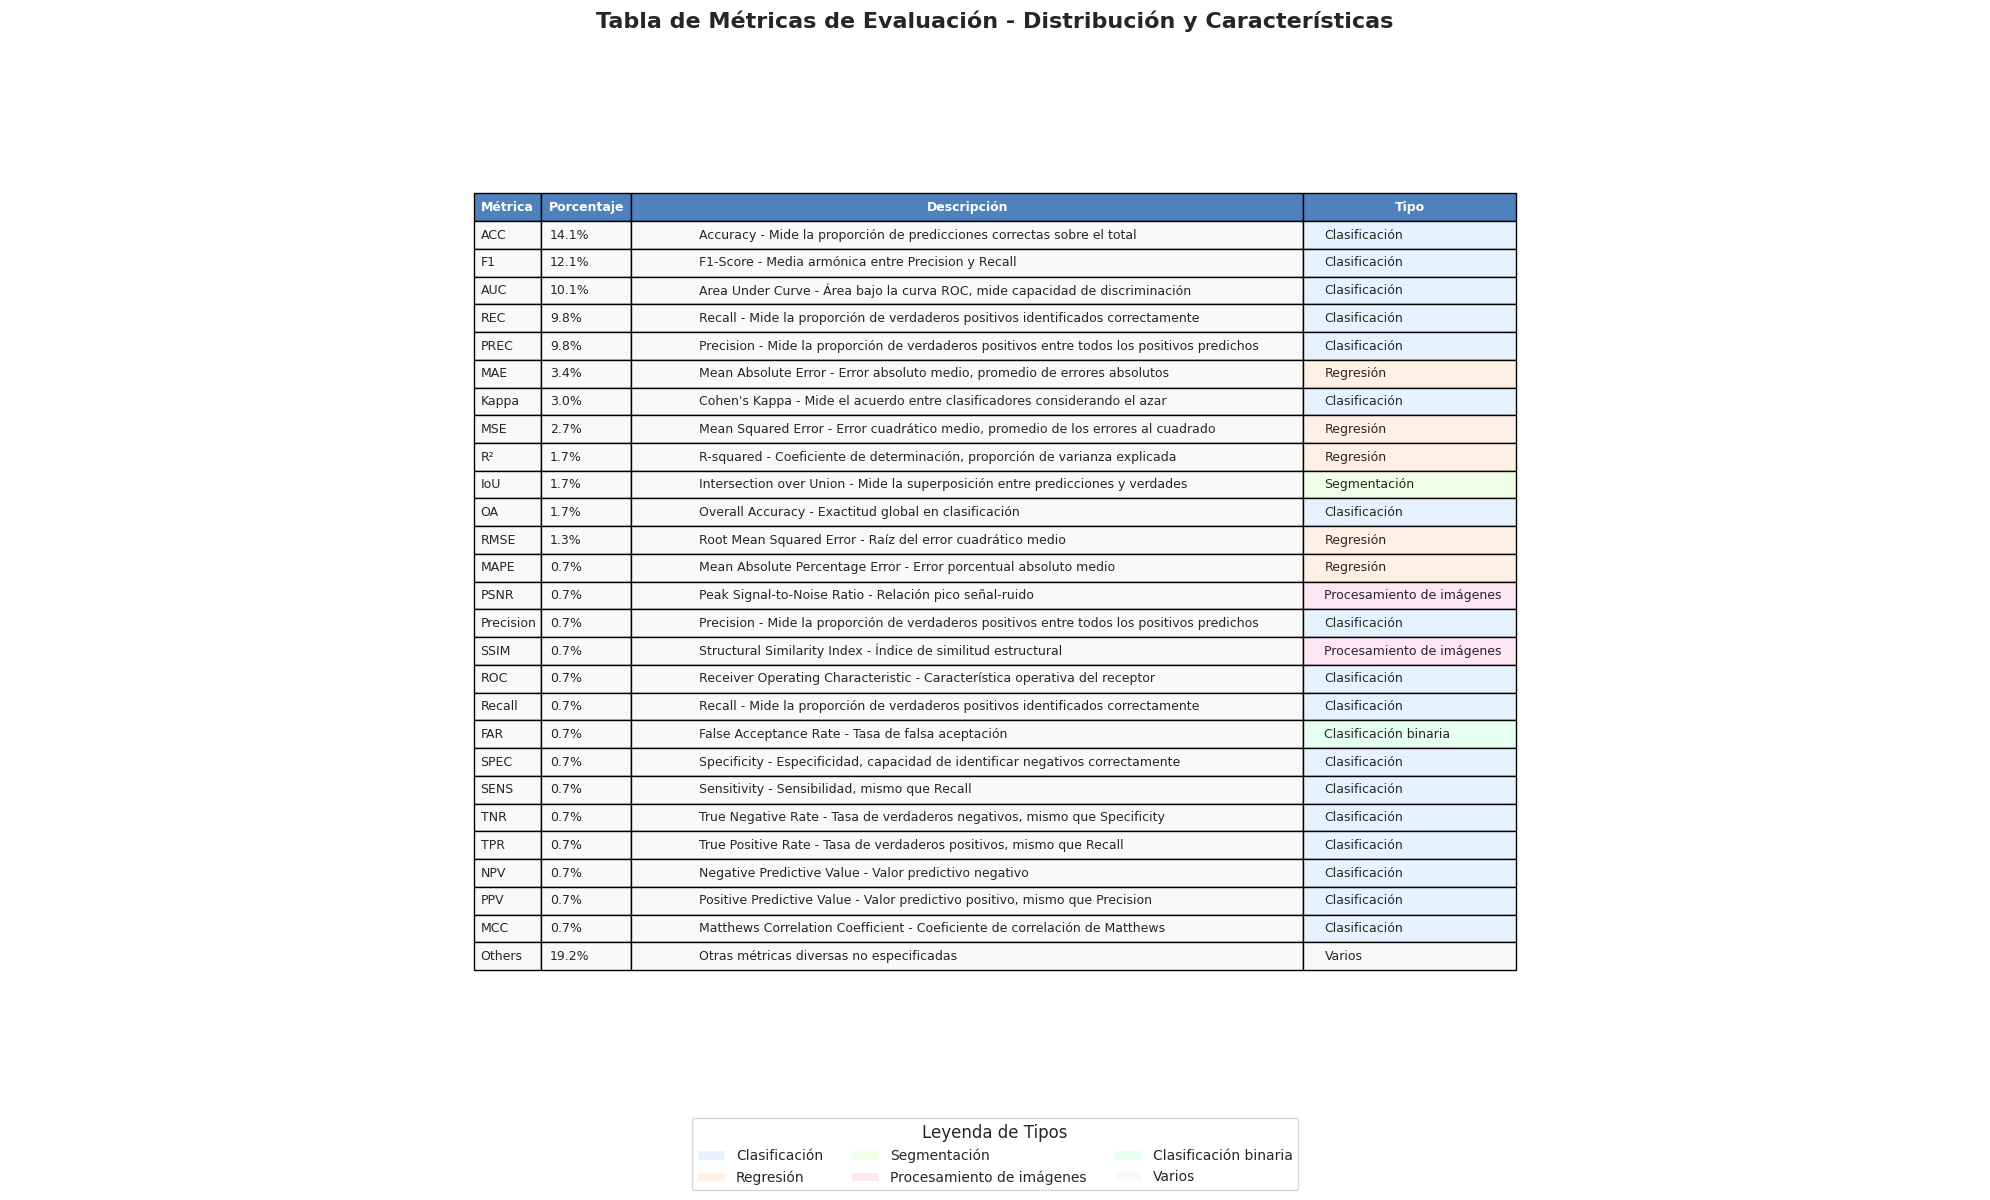

Tabla guardada como 'tabla_metricas_evaluacion.png'


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Datos de la tabla
data = {
    'Métrica': ['ACC', 'F1', 'AUC', 'REC', 'PREC', 'MAE', 'Kappa', 'MSE', 'R²', 'IoU', 'OA', 'RMSE', 'MAPE',
               'PSNR', 'Precision', 'SSIM', 'ROC', 'Recall', 'FAR', 'SPEC', 'SENS', 'TNR', 'TPR', 'NPV', 'PPV', 'MCC', 'Others'],
    'Porcentaje': ['14.1%', '12.1%', '10.1%', '9.8%', '9.8%', '3.4%', '3.0%', '2.7%', '1.7%', '1.7%', '1.7%',
                  '1.3%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%',
                  '0.7%', '0.7%', '0.7%', '0.7%', '19.2%'],
    'Descripción': [
        'Accuracy - Mide la proporción de predicciones correctas sobre el total',
        'F1-Score - Media armónica entre Precision y Recall',
        'Area Under Curve - Área bajo la curva ROC, mide capacidad de discriminación',
        'Recall - Mide la proporción de verdaderos positivos identificados correctamente',
        'Precision - Mide la proporción de verdaderos positivos entre todos los positivos predichos',
        'Mean Absolute Error - Error absoluto medio, promedio de errores absolutos',
        "Cohen's Kappa - Mide el acuerdo entre clasificadores considerando el azar",
        'Mean Squared Error - Error cuadrático medio, promedio de los errores al cuadrado',
        'R-squared - Coeficiente de determinación, proporción de varianza explicada',
        'Intersection over Union - Mide la superposición entre predicciones y verdades',
        'Overall Accuracy - Exactitud global en clasificación',
        'Root Mean Squared Error - Raíz del error cuadrático medio',
        'Mean Absolute Percentage Error - Error porcentual absoluto medio',
        'Peak Signal-to-Noise Ratio - Relación pico señal-ruido',
        'Precision - Mide la proporción de verdaderos positivos entre todos los positivos predichos',
        'Structural Similarity Index - Índice de similitud estructural',
        'Receiver Operating Characteristic - Característica operativa del receptor',
        'Recall - Mide la proporción de verdaderos positivos identificados correctamente',
        'False Acceptance Rate - Tasa de falsa aceptación',
        'Specificity - Especificidad, capacidad de identificar negativos correctamente',
        'Sensitivity - Sensibilidad, mismo que Recall',
        'True Negative Rate - Tasa de verdaderos negativos, mismo que Specificity',
        'True Positive Rate - Tasa de verdaderos positivos, mismo que Recall',
        'Negative Predictive Value - Valor predictivo negativo',
        'Positive Predictive Value - Valor predictivo positivo, mismo que Precision',
        'Matthews Correlation Coefficient - Coeficiente de correlación de Matthews',
        'Otras métricas diversas no especificadas'
    ],
    'Tipo': [
        'Clasificación', 'Clasificación', 'Clasificación', 'Clasificación', 'Clasificación',
        'Regresión', 'Clasificación', 'Regresión', 'Regresión', 'Segmentación',
        'Clasificación', 'Regresión', 'Regresión', 'Procesamiento de imágenes',
        'Clasificación', 'Procesamiento de imágenes', 'Clasificación', 'Clasificación',
        'Clasificación binaria', 'Clasificación', 'Clasificación', 'Clasificación',
        'Clasificación', 'Clasificación', 'Clasificación', 'Clasificación', 'Varios'
    ]
}

df = pd.DataFrame(data)

# Crear la figura
fig, ax = plt.subplots(figsize=(20, 12))
ax.axis('tight')
ax.axis('off')

# Crear la tabla
table = ax.table(cellText=df.values,
                 colLabels=df.columns,
                 cellLoc='left',
                 loc='center',
                 colColours=['#f0f0f0']*4,
                 cellColours=[['#f9f9f9']*4] * len(df))

# Configurar estilo de la tabla
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)

# Ajustar ancho de columnas manualmente
table.auto_set_column_width([0, 1, 2, 3])

# Colores para diferentes tipos
type_colors = {
    'Clasificación': '#e6f3ff',
    'Regresión': '#fff0e6',
    'Segmentación': '#f0ffe6',
    'Procesamiento de imágenes': '#ffe6f3',
    'Clasificación binaria': '#e6fff0',
    'Varios': '#f9f9f9'
}

# Aplicar colores a la columna de Tipo
for i in range(1, len(df) + 1):
    cell_type = df.iloc[i-1]['Tipo']
    color = type_colors.get(cell_type, '#f9f9f9')
    table[(i, 3)].set_facecolor(color)

# Resaltar encabezados
for j in range(4):
    table[(0, j)].set_facecolor('#4f81bd')
    table[(0, j)].set_text_props(weight='bold', color='white')

# Título
plt.title('Tabla de Métricas de Evaluación - Distribución y Características',
          fontsize=16, weight='bold', pad=30)

# Leyenda de colores
legend_elements = []
for tipo, color in type_colors.items():
    legend_elements.append(plt.Rectangle((0, 0), 1, 1, fc=color, label=tipo))

plt.legend(handles=legend_elements,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.1),
           ncol=3,
           fontsize=10,
           title='Leyenda de Tipos',
           title_fontsize=12)

plt.tight_layout()
plt.savefig("tabla_metricas_evaluacion.png",
            dpi=600,
            bbox_inches='tight',
            facecolor='white')
plt.show()

print("Tabla guardada como 'tabla_metricas_evaluacion.png'")

In [53]:
! pip install docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docx: filename=docx-0.2.4-py3-none-any.whl size=53893 sha256=f8d3dbe98fd522421cd474253d6fb105cf7855fcc9c7a03d2f0c87f73f4c17d5
  Stored in directory: /root/.cache/pip/wheels/f3/ba/dd/43ed5f165600f41deddeb1e382c56ffc1067c09ec5bd705f39
Successfully built docx


In [ ]:
!pip install python-docx

In [55]:
import pandas as pd
from docx import Document
from docx.shared import Inches, Pt
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.oxml.ns import qn
from docx.oxml import OxmlElement

# Data for the table (translated to English)
data = {
    'Metric': ['ACC', 'F1', 'AUC', 'REC', 'PREC', 'MAE', 'Kappa', 'MSE', 'R²', 'IoU', 'OA', 'RMSE', 'MAPE',
               'PSNR', 'Precision', 'SSIM', 'ROC', 'Recall', 'FAR', 'SPEC', 'SENS', 'TNR', 'TPR', 'NPV', 'PPV', 'MCC', 'Others'],
    'Percentage': ['14.1%', '12.1%', '10.1%', '9.8%', '9.8%', '3.4%', '3.0%', '2.7%', '1.7%', '1.7%', '1.7%',
                  '1.3%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%',
                  '0.7%', '0.7%', '0.7%', '0.7%', '19.2%'],
    'Description': [
        'Accuracy - Measures the proportion of correct predictions over the total',
        'F1-Score - Harmonic mean between Precision and Recall',
        'Area Under Curve - Area under the ROC curve, measures discrimination capability',
        'Recall - Measures the proportion of true positives correctly identified',
        'Precision - Measures the proportion of true positives among all predicted positives',
        'Mean Absolute Error - Average of absolute errors',
        "Cohen's Kappa - Measures agreement between classifiers considering chance",
        'Mean Squared Error - Average of squared errors',
        'R-squared - Coefficient of determination, proportion of explained variance',
        'Intersection over Union - Measures overlap between predictions and ground truths',
        'Overall Accuracy - Global accuracy in classification',
        'Root Mean Squared Error - Square root of mean squared error',
        'Mean Absolute Percentage Error - Average absolute percentage error',
        'Peak Signal-to-Noise Ratio - Peak signal-to-noise ratio',
        'Precision - Measures the proportion of true positives among all predicted positives',
        'Structural Similarity Index - Structural similarity index',
        'Receiver Operating Characteristic - Receiver operating characteristic curve',
        'Recall - Measures the proportion of true positives correctly identified',
        'False Acceptance Rate - False acceptance rate',
        'Specificity - Ability to correctly identify negatives',
        'Sensitivity - Same as Recall',
        'True Negative Rate - Same as Specificity',
        'True Positive Rate - Same as Recall',
        'Negative Predictive Value - Negative predictive value',
        'Positive Predictive Value - Same as Precision',
        'Matthews Correlation Coefficient - Matthews correlation coefficient',
        'Other unspecified diverse metrics'
    ],
    'Type': [
        'Classification', 'Classification', 'Classification', 'Classification', 'Classification',
        'Regression', 'Classification', 'Regression', 'Regression', 'Segmentation',
        'Classification', 'Regression', 'Regression', 'Image Processing',
        'Classification', 'Image Processing', 'Classification', 'Classification',
        'Binary Classification', 'Classification', 'Classification', 'Classification',
        'Classification', 'Classification', 'Classification', 'Classification', 'Various'
    ]
}

df = pd.DataFrame(data)

# Create a new Word document
doc = Document()

# Add a title
title = doc.add_heading('Evaluation Metrics Distribution and Characteristics', level=1)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Add a table
table = doc.add_table(rows=1, cols=4)
table.style = 'Table Grid'

# Set header row
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Metric'
hdr_cells[1].text = 'Percentage'
hdr_cells[2].text = 'Description'
hdr_cells[3].text = 'Type'

# Make header bold
for cell in hdr_cells:
    for paragraph in cell.paragraphs:
        for run in paragraph.runs:
            run.bold = True

# Add data to the table
for _, row in df.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Metric']
    row_cells[1].text = row['Percentage']
    row_cells[2].text = row['Description']
    row_cells[3].text = row['Type']

# Adjust column widths
for column in table.columns:
    for cell in column.cells:
        cell.width = Inches(1.0)  # Adjust as needed

# Set the description column to be wider
for cell in table.columns[2].cells:
    cell.width = Inches(3.5)

# Set font size for the entire table
for row in table.rows:
    for cell in row.cells:
        for paragraph in cell.paragraphs:
            paragraph.style.font.size = Pt(10)

# Add a caption
doc.add_paragraph().add_run('Table 1: Evaluation metrics distribution and characteristics.').italic = True

# Save the document
doc.save('evaluation_metrics_table.docx')

print("Table saved as 'evaluation_metrics_table.docx'")

ModuleNotFoundError: No module named 'exceptions'

In [56]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 7.8 MB/s eta 0:00:00


In [57]:
import pandas as pd
from docx import Document
from docx.shared import Inches, Pt
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.oxml.ns import qn
from docx.oxml import OxmlElement

# Data for the table (translated to English)
data = {
    'Metric': ['ACC', 'F1', 'AUC', 'REC', 'PREC', 'MAE', 'Kappa', 'MSE', 'R²', 'IoU', 'OA', 'RMSE', 'MAPE',
               'PSNR', 'Precision', 'SSIM', 'ROC', 'Recall', 'FAR', 'SPEC', 'SENS', 'TNR', 'TPR', 'NPV', 'PPV', 'MCC', 'Others'],
    'Percentage': ['14.1%', '12.1%', '10.1%', '9.8%', '9.8%', '3.4%', '3.0%', '2.7%', '1.7%', '1.7%', '1.7%',
                  '1.3%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%',
                  '0.7%', '0.7%', '0.7%', '0.7%', '19.2%'],
    'Description': [
        'Accuracy - Measures the proportion of correct predictions over the total',
        'F1-Score - Harmonic mean between Precision and Recall',
        'Area Under Curve - Area under the ROC curve, measures discrimination capability',
        'Recall - Measures the proportion of true positives correctly identified',
        'Precision - Measures the proportion of true positives among all predicted positives',
        'Mean Absolute Error - Average of absolute errors',
        "Cohen's Kappa - Measures agreement between classifiers considering chance",
        'Mean Squared Error - Average of squared errors',
        'R-squared - Coefficient of determination, proportion of explained variance',
        'Intersection over Union - Measures overlap between predictions and ground truths',
        'Overall Accuracy - Global accuracy in classification',
        'Root Mean Squared Error - Square root of mean squared error',
        'Mean Absolute Percentage Error - Average absolute percentage error',
        'Peak Signal-to-Noise Ratio - Peak signal-to-noise ratio',
        'Precision - Measures the proportion of true positives among all predicted positives',
        'Structural Similarity Index - Structural similarity index',
        'Receiver Operating Characteristic - Receiver operating characteristic curve',
        'Recall - Measures the proportion of true positives correctly identified',
        'False Acceptance Rate - False acceptance rate',
        'Specificity - Ability to correctly identify negatives',
        'Sensitivity - Same as Recall',
        'True Negative Rate - Same as Specificity',
        'True Positive Rate - Same as Recall',
        'Negative Predictive Value - Negative predictive value',
        'Positive Predictive Value - Same as Precision',
        'Matthews Correlation Coefficient - Matthews correlation coefficient',
        'Other unspecified diverse metrics'
    ],
    'Type': [
        'Classification', 'Classification', 'Classification', 'Classification', 'Classification',
        'Regression', 'Classification', 'Regression', 'Regression', 'Segmentation',
        'Classification', 'Regression', 'Regression', 'Image Processing',
        'Classification', 'Image Processing', 'Classification', 'Classification',
        'Binary Classification', 'Classification', 'Classification', 'Classification',
        'Classification', 'Classification', 'Classification', 'Classification', 'Various'
    ]
}

df = pd.DataFrame(data)

# Create a new Word document
doc = Document()

# Add a title
title = doc.add_heading('Evaluation Metrics Distribution and Characteristics', level=1)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Add a table
table = doc.add_table(rows=1, cols=4)
table.style = 'Table Grid'

# Set header row
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Metric'
hdr_cells[1].text = 'Percentage'
hdr_cells[2].text = 'Description'
hdr_cells[3].text = 'Type'

# Make header bold
for cell in hdr_cells:
    for paragraph in cell.paragraphs:
        for run in paragraph.runs:
            run.bold = True

# Add data to the table
for _, row in df.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Metric']
    row_cells[1].text = row['Percentage']
    row_cells[2].text = row['Description']
    row_cells[3].text = row['Type']

# Adjust column widths
for column in table.columns:
    for cell in column.cells:
        cell.width = Inches(1.0)  # Adjust as needed

# Set the description column to be wider
for cell in table.columns[2].cells:
    cell.width = Inches(3.5)

# Set font size for the entire table
for row in table.rows:
    for cell in row.cells:
        for paragraph in cell.paragraphs:
            paragraph.style.font.size = Pt(10)

# Add a caption
doc.add_paragraph().add_run('Table 1: Evaluation metrics distribution and characteristics.').italic = True

# Save the document
doc.save('evaluation_metrics_table.docx')

print("Table saved as 'evaluation_metrics_table.docx'")

Table saved as 'evaluation_metrics_table.docx'


In [58]:
import pandas as pd
from docx import Document
from docx.shared import Inches, Pt
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.oxml.ns import qn
from docx.oxml import OxmlElement

# Data for the table (translated to English)
data = {
    'Metric': ['ACC', 'F1', 'AUC', 'REC', 'PREC', 'MAE', 'Kappa', 'MSE', 'R²', 'IoU', 'OA', 'RMSE', 'MAPE',
               'PSNR', 'Precision', 'SSIM', 'ROC', 'Recall', 'FAR', 'SPEC', 'SENS', 'TNR', 'TPR', 'NPV', 'PPV', 'MCC', 'Others'],
    'Percentage': ['14.1%', '12.1%', '10.1%', '9.8%', '9.8%', '3.4%', '3.0%', '2.7%', '1.7%', '1.7%', '1.7%',
                  '1.3%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%', '0.7%',
                  '0.7%', '0.7%', '0.7%', '0.7%', '19.2%'],
    'Description': [
        'Accuracy - Measures the proportion of correct predictions over the total',
        'F1-Score - Harmonic mean between Precision and Recall',
        'Area Under Curve - Area under the ROC curve, measures discrimination capability',
        'Recall - Measures the proportion of true positives correctly identified',
        'Precision - Measures the proportion of true positives among all predicted positives',
        'Mean Absolute Error - Average of absolute errors',
        "Cohen's Kappa - Measures agreement between classifiers considering chance",
        'Mean Squared Error - Average of squared errors',
        'R-squared - Coefficient of determination, proportion of explained variance',
        'Intersection over Union - Measures overlap between predictions and ground truths',
        'Overall Accuracy - Global accuracy in classification',
        'Root Mean Squared Error - Square root of mean squared error',
        'Mean Absolute Percentage Error - Average absolute percentage error',
        'Peak Signal-to-Noise Ratio - Peak signal-to-noise ratio',
        'Precision - Measures the proportion of true positives among all predicted positives',
        'Structural Similarity Index - Structural similarity index',
        'Receiver Operating Characteristic - Receiver operating characteristic curve',
        'Recall - Measures the proportion of true positives correctly identified',
        'False Acceptance Rate - False acceptance rate',
        'Specificity - Ability to correctly identify negatives',
        'Sensitivity - Same as Recall',
        'True Negative Rate - Same as Specificity',
        'True Positive Rate - Same as Recall',
        'Negative Predictive Value - Negative predictive value',
        'Positive Predictive Value - Same as Precision',
        'Matthews Correlation Coefficient - Matthews correlation coefficient',
        'Other unspecified diverse metrics'
    ],
    'Type': [
        'Classification', 'Classification', 'Classification', 'Classification', 'Classification',
        'Regression', 'Classification', 'Regression', 'Regression', 'Segmentation',
        'Classification', 'Regression', 'Regression', 'Image Processing',
        'Classification', 'Image Processing', 'Classification', 'Classification',
        'Binary Classification', 'Classification', 'Classification', 'Classification',
        'Classification', 'Classification', 'Classification', 'Classification', 'Various'
    ]
}

df = pd.DataFrame(data)

# Create a new Word document
doc = Document()

# Add a title
title = doc.add_heading('Evaluation Metrics Distribution and Characteristics', level=1)
title.alignment = WD_ALIGN_PARAGRAPH.CENTER

# Add a table
table = doc.add_table(rows=1, cols=4)
table.style = 'Table Grid'

# Set header row
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Metric'
hdr_cells[1].text = 'Percentage'
hdr_cells[2].text = 'Description'
hdr_cells[3].text = 'Type'

# Make header bold
for cell in hdr_cells:
    for paragraph in cell.paragraphs:
        for run in paragraph.runs:
            run.bold = True

# Add data to the table
for _, row in df.iterrows():
    row_cells = table.add_row().cells
    row_cells[0].text = row['Metric']
    row_cells[1].text = row['Percentage']
    row_cells[2].text = row['Description']
    row_cells[3].text = row['Type']

# Adjust column widths
for column in table.columns:
    for cell in column.cells:
        cell.width = Inches(1.0)  # Adjust as needed

# Set the description column to be wider
for cell in table.columns[2].cells:
    cell.width = Inches(3.5)

# Set font size for the entire table
for row in table.rows:
    for cell in row.cells:
        for paragraph in cell.paragraphs:
            paragraph.style.font.size = Pt(10)

# Add a caption
doc.add_paragraph().add_run('Table 1: Evaluation metrics distribution and characteristics.').italic = True

# Save the document
doc.save('evaluation_metrics_table.docx')

print("Table saved as 'evaluation_metrics_table.docx'")

Table saved as 'evaluation_metrics_table.docx'


-----
-----


# Disponibilidad de repositorios

In [ ]:
# Calculate percentages
total_repos = repo_availability.sum()
repo_availability_percentages = (repo_availability / total_repos) * 100

# Create the bar chart with percentages
plt.figure(figsize=(20, 10))
sns.barplot(x=repo_availability_percentages.index, y=repo_availability_percentages.values, palette='grey')
plt.title("Availability of Open Repositories", fontsize=24)
plt.xlabel("", fontsize=24)
plt.ylabel("Percentage", fontsize=16)
plt.show()

# Print the counts for Si and No
print(f"Total de 'Si': {repo_availability.get('Si', 0)}")
print(f"Total de 'No': {repo_availability.get('No', 0)}")


NameError: name 'repo_availability' is not defined

In [ ]:
# Print the percentages for each category in repo_availability
for category, percentage in repo_availability_percentages.items():
    print(f"'{category}': {percentage:.2f}%")


'No': 92.13%
'Si': 7.87%


# Chi cuadrada para saber si hay relacion entre algoritmo vs disponibilidad de repositorio

In [ ]:
# Get the top 14 algorithms
top_14_algorithms = df['Algoritmo'].value_counts().head(14).index.tolist()

# Filter the DataFrame to include only the top 14 algorithms
df_filtered = df[df['Algoritmo'].isin(top_14_algorithms)].copy()

In [ ]:
# Seleccionar solo las columnas necesarias y eliminar filas con valores NaN
df_clean = df[['Algoritmo', 'Repositorio']].dropna()

# Convertir la columna "Repositorio" en valores binarios (1=Si, 0=No)
df_clean['Repositorio'] = df_clean['Repositorio'].apply(lambda x: 1 if str(x).strip().lower() == 'si' else 0)

# Crear la tabla de contingencia
contingency_table = pd.crosstab(df_clean['Algoritmo'], df_clean['Repositorio'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Mostrar resultados
print(f"Chi-cuadrado: {chi2}")
print(f"Valor p: {p}")

# Interpretación
def interpretar_resultado(p_valor, alpha=0.05):
    if p_valor < alpha:
        print("Existe una relación significativa entre el tipo de algoritmo y la disponibilidad del código en un repositorio.")
    else:
        print("No se encontró una relación significativa entre el tipo de algoritmo y la disponibilidad del código en un repositorio.")

interpretar_resultado(p)




Chi-cuadrado: 89.00000000000001
Valor p: 0.0010650323345192678
Existe una relación significativa entre el tipo de algoritmo y la disponibilidad del código en un repositorio.


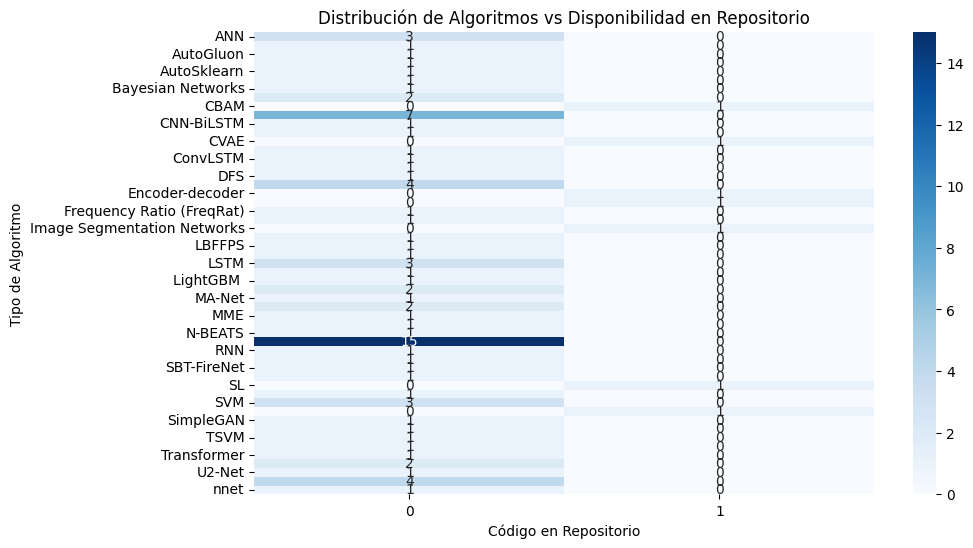

In [ ]:
# Visualización de los resultados
plt.figure(figsize=(10,6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Código en Repositorio')
plt.ylabel('Tipo de Algoritmo')
plt.title('Distribución de Algoritmos vs Disponibilidad en Repositorio')
plt.show()
